<p style="text-align: center; font-size: 12px;">
Hello! Your future engineers are leveling up their ML skills.
</p>

## **Step 1 — Business Understanding: Breast Cancer Detection (WDBC)**  

### **1. Context**
Breast cancer is a disease where **early detection** dramatically improves survival rates.  
Traditional methods (like biopsies) are **time-consuming** and **expensive**, which is why **Machine Learning (ML)** and **Deep Learning (DL)** hold such promise for quickly analyzing cellular features from the **FNA** method.

---

### **2. Problem Statement**
How can we use data from the **Wisconsin Diagnostic Breast Cancer (WDBC)** dataset to predict if a tumor is **benign** or **malignant**, while cutting down on the time and costs of exams?

---

### **3. Objectives (BO & DSO)**: 

In this oncology-focused narrative, we follow Sarah's complete A-to-Z journey from discovering a breast lump to achieving hope through advanced diagnostics. It highlights three key objectives in breast cancer detection using machine learning on the WDBC dataset:

- **Swift detection of malignant tumors**: From awareness and consultation to fast ML-based binary classification, optimizing for precision, sensitivity, and specificity to catch cancer early.
- **Reduction of unnecessary tests**: By honing in on essential features via techniques like T-SNE or feature selection, simplifying analysis and minimizing extra procedures.
- **Identification of the best model**: Comparing algorithms such as MLP, SVM, GRU-SVM, Linear Regression, Softmax, and KNN to select the most reliable for accurate diagnoses.




## 📘 **Étape 2 — Data Understanding**

Comprendre précisément chaque variable est essentiel avant toute modélisation.  
Voici une version structurée et claire des colonnes du dataset WDBC :

---



| **Colonne** | **Description** |
|-------------|------------------|
| **id** | Identifiant unique du patient (anonymisé). |
| **diagnosis** | Type de tumeur : **M = Maligne**, **B = Bénigne**. |
| **radius_mean** | Rayon moyen : distance moyenne entre le centre et le contour du noyau. |
| **texture_mean** | Variation moyenne des niveaux de gris (granularité). |
| **perimeter_mean** | Longueur moyenne du contour des noyaux. |
| **area_mean** | Surface moyenne des noyaux. |
| **smoothness_mean** | Régularité locale du contour. |
| **compactness_mean** | Densité de la forme (périmètre² / aire). |
| **concavity_mean** | Profondeur moyenne des concavités du contour. |
| **concave points_mean** | Nombre moyen de points concaves. |
| **symmetry_mean** | Symétrie globale de la forme. |
| **fractal_dimension_mean** | Complexité fractale du contour. |
| **radius_se** | Variabilité (erreur standard) du rayon. |
| **texture_se** | Variabilité de la texture. |
| **perimeter_se** | Variabilité du périmètre. |
| **area_se** | Variabilité de la surface. |
| **smoothness_se** | Variabilité du lissage du contour. |
| **compactness_se** | Variabilité de la compacité. |
| **concavity_se** | Variabilité de la concavité. |
| **concave points_se** | Variabilité du nombre de points concaves. |
| **symmetry_se** | Variabilité de la symétrie. |
| **fractal_dimension_se** | Variabilité de la dimension fractale. |
| **radius_worst** | Moyenne des 3 plus grands rayons observés. |
| **texture_worst** | Moyenne des 3 valeurs de texture les plus élevées. |
| **perimeter_worst** | Moyenne des 3 plus grands périmètres. |
| **area_worst** | Moyenne des 3 surfaces maximales. |
| **smoothness_worst** | Moyenne des 3 irrégularités les plus fortes. |
| **compactness_worst** | Moyenne des 3 compacités les plus élevées. |
| **concavity_worst** | Moyenne des 3 concavités les plus profondes. |
| **concave points_worst** | Moyenne des 3 plus grands nombres de points concaves. |
| **symmetry_worst** | Moyenne des 3 valeurs de symétrie les plus atypiques. |
| **fractal_dimension_worst** | Moyenne des 3 complexités fractales les plus élevées. |

---

### 📝 **Résumé visuel**
- **30 features** → toutes numériques  
- **3 familles par feature** : `_mean`, `_se`, `_worst`  
- **Objectif principal** : distinguer *bénigne* / *maligne* via les caractéristiques cellulaires FNA  

---



In [15]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler




In [18]:
# Chargement du dataset
df = pd.read_csv("data.csv")

print("────────────────────────────────────────────")
print("   📁 Dataset chargé avec succès")
print("────────────────────────────────────────────")
print(f"📊 Nombre d'observations : {df.shape[0]}")
print(f"📐 Nombre de variables    : {df.shape[1]}")
print("────────────────────────────────────────────")


────────────────────────────────────────────
   📁 Dataset chargé avec succès
────────────────────────────────────────────
📊 Nombre d'observations : 569
📐 Nombre de variables    : 33
────────────────────────────────────────────


In [19]:

print("🔍 APERÇU DU DATASET")

print(" Premières 5 lignes :")
display(df.head())

print("\n Dernières 5 lignes :")
display(df.tail())

print("\n📊 Informations sur le dataset :")
df.info()


🔍 APERÇU DU DATASET
 Premières 5 lignes :


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]


 Dernières 5 lignes :


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]


📊 Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float6

In [20]:
# 2. Analyse descriptive des données
print("="*60)
print("📈 STATISTIQUES DESCRIPTIVES")
print("="*60)

# Statistiques descriptives pour toutes les variables numériques
print("\n📊 Statistiques descriptives complètes:")
display(df.describe())

print("\n🔢 Types de données par colonne:")
display(df.dtypes.value_counts())


📈 STATISTIQUES DESCRIPTIVES

📊 Statistiques descriptives complètes:


id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]


🔢 Types de données par colonne:


float64    31
int64       1
object      1
Name: count, dtype: int64

🎯 ANALYSE DE LA VARIABLE CIBLE (DIAGNOSIS)
📊 Distribution des diagnostics:
diagnosis
B    357
M    212
Name: count, dtype: int64

📊 Pourcentages:
B: 62.74%
M: 37.26%


/tmp/ipython-input-2515048642.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette='viridis')


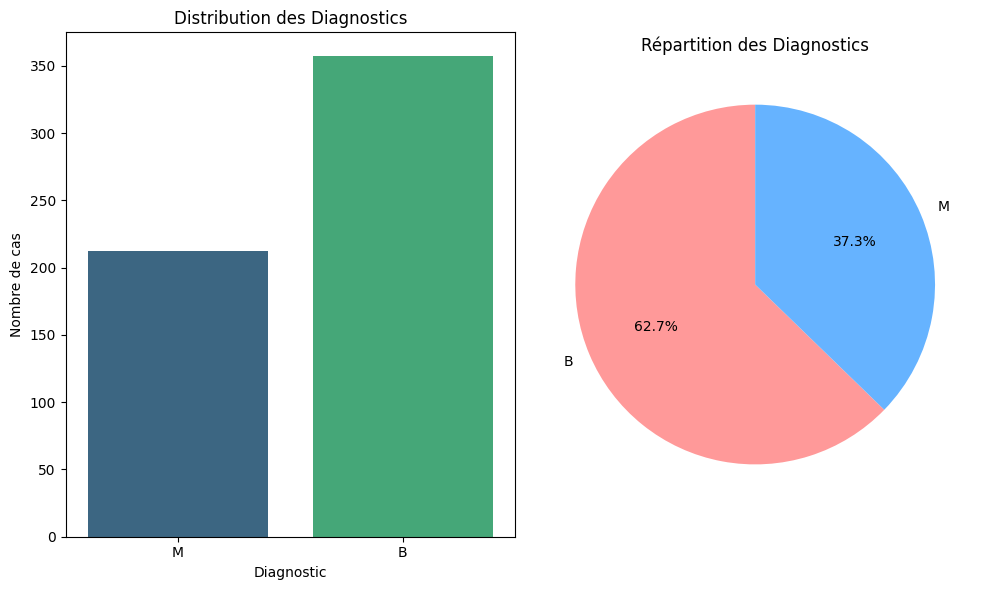


⚖️ Rapport Maligne/Bénigne: 0.59
⚠️  Dataset déséquilibré détecté!


In [21]:
# 3. Analyse de la variable cible (diagnosis)
print("="*60)
print("🎯 ANALYSE DE LA VARIABLE CIBLE (DIAGNOSIS)")
print("="*60)

if 'diagnosis' in df.columns:
    # Distribution de la variable cible
    print("📊 Distribution des diagnostics:")
    diagnosis_counts = df['diagnosis'].value_counts()
    print(diagnosis_counts)

    print("\n📊 Pourcentages:")
    diagnosis_percentages = df['diagnosis'].value_counts(normalize=True) * 100
    for diagnosis, percentage in diagnosis_percentages.items():
        print(f"{diagnosis}: {percentage:.2f}%")

    # Graphique de la distribution
    plt.figure(figsize=(10, 6))

    # Subplot 1: Count plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='diagnosis', palette='viridis')
    plt.title('Distribution des Diagnostics')
    plt.xlabel('Diagnostic')
    plt.ylabel('Nombre de cas')

    # Subplot 2: Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(diagnosis_counts.values, labels=diagnosis_counts.index, autopct='%1.1f%%',
            colors=['#ff9999', '#66b3ff'], startangle=90)
    plt.title('Répartition des Diagnostics')

    plt.tight_layout()
    plt.show()

    # Equilibre des classes
    print(f"\n⚖️ Rapport Maligne/Bénigne: {diagnosis_counts['M'] / diagnosis_counts['B']:.2f}")
    if abs(diagnosis_counts['M'] - diagnosis_counts['B']) > len(df) * 0.1:
        print("⚠️  Dataset déséquilibré détecté!")
    else:
        print("✅ Dataset relativement équilibré")

else:
    print("❌ Colonne 'diagnosis' non trouvée dans le dataset")

🔍 ANALYSE DES VALEURS MANQUANTES
📊 Valeurs manquantes par colonne:
    Colonne  Valeurs manquantes  Pourcentage
Unnamed: 32                 569        100.0


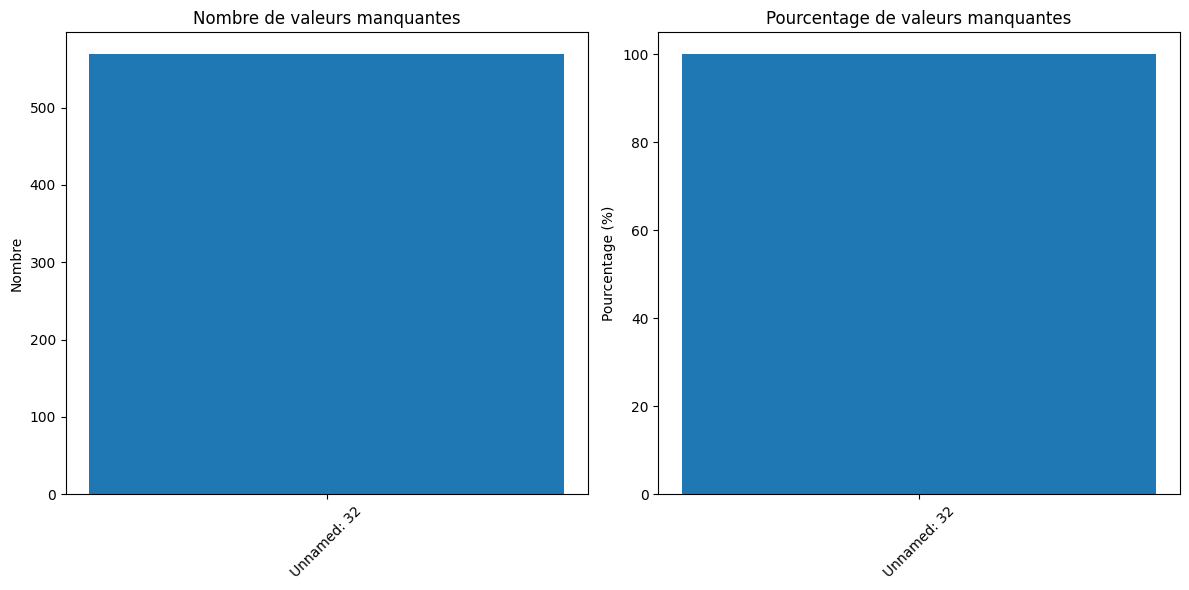


📊 Résumé:
Total des valeurs manquantes: 569
Pourcentage total: 3.03%


In [22]:
# 4. Détection des valeurs manquantes
print("="*60)
print("🔍 ANALYSE DES VALEURS MANQUANTES")
print("="*60)

# Comptage des valeurs manquantes
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("📊 Valeurs manquantes par colonne:")
missing_info = pd.DataFrame({
    'Colonne': missing_values.index,
    'Valeurs manquantes': missing_values.values,
    'Pourcentage': missing_percentage.values
})

# Afficher seulement les colonnes avec des valeurs manquantes
missing_info_filtered = missing_info[missing_info['Valeurs manquantes'] > 0]

if len(missing_info_filtered) > 0:
    print(missing_info_filtered.to_string(index=False))

    # Visualisation des valeurs manquantes
    plt.figure(figsize=(12, 6))
    missing_data = missing_info_filtered.sort_values('Valeurs manquantes', ascending=False)

    plt.subplot(1, 2, 1)
    plt.bar(range(len(missing_data)), missing_data['Valeurs manquantes'])
    plt.xticks(range(len(missing_data)), missing_data['Colonne'], rotation=45)
    plt.title('Nombre de valeurs manquantes')
    plt.ylabel('Nombre')

    plt.subplot(1, 2, 2)
    plt.bar(range(len(missing_data)), missing_data['Pourcentage'])
    plt.xticks(range(len(missing_data)), missing_data['Colonne'], rotation=45)
    plt.title('Pourcentage de valeurs manquantes')
    plt.ylabel('Pourcentage (%)')

    plt.tight_layout()
    plt.show()
else:
    print("✅ Aucune valeur manquante détectée dans le dataset!")

print(f"\n📊 Résumé:")
print(f"Total des valeurs manquantes: {missing_values.sum()}")
print(f"Pourcentage total: {(missing_values.sum() / (len(df) * len(df.columns))) * 100:.2f}%")

🚨 DÉTECTION DES VALEURS ABERRANTES
📊 Analyse des outliers sur 31 variables numériques

📊 Résumé des outliers (méthode IQR):
        Variable  Nombre_outliers  Pourcentage  Borne_inf  Borne_sup
     radius_mean               14         2.46       5.58      21.90
    texture_mean                7         1.23       7.73      30.24
  perimeter_mean               13         2.28      31.78     147.49
       area_mean               25         4.39    -123.30    1326.30
 smoothness_mean                6         1.05       0.06       0.13
compactness_mean               16         2.81      -0.03       0.23


/tmp/ipython-input-2263925660.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='Set2')
/tmp/ipython-input-2263925660.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='Set2')
/tmp/ipython-input-2263925660.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='Set2')
/tmp/ipython-input-2263925660.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect

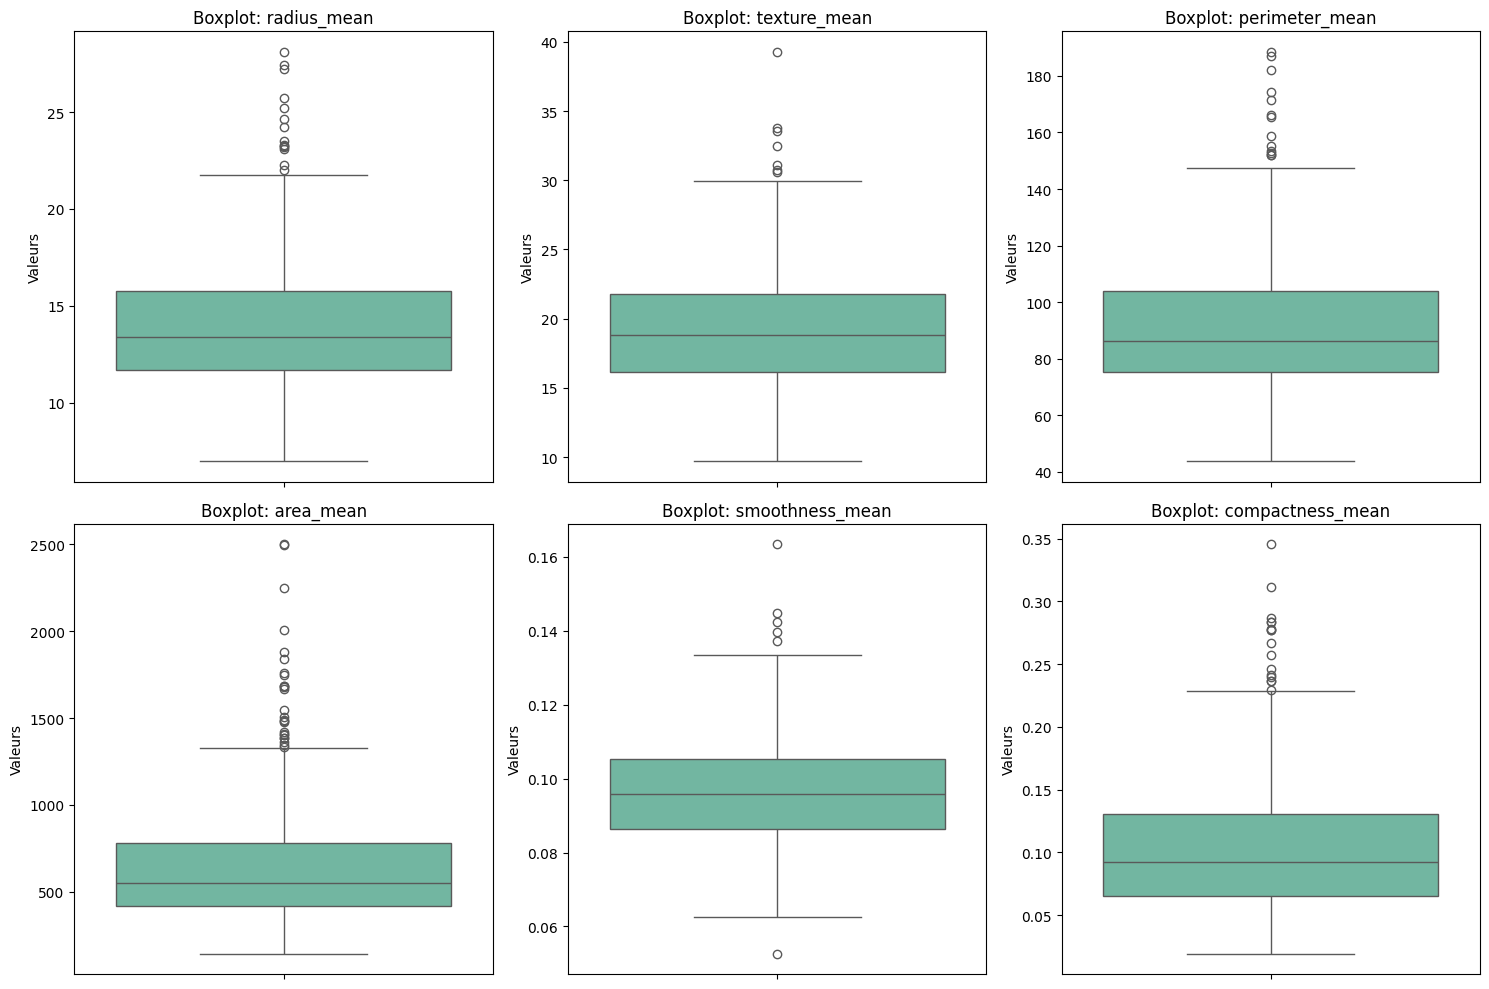


📈 Variables avec le plus d'outliers:
• area_mean: 25 outliers (4.39%)
• compactness_mean: 16 outliers (2.81%)
• radius_mean: 14 outliers (2.46%)


In [23]:
# 5. Détection des valeurs aberrantes (outliers)
print("="*60)
print("🚨 DÉTECTION DES VALEURS ABERRANTES")
print("="*60)

# Sélectionner seulement les colonnes numériques (exclure 'id' et 'diagnosis')
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numeric_columns:
    numeric_columns.remove('id')

print(f"📊 Analyse des outliers sur {len(numeric_columns)} variables numériques")

# Méthode IQR pour détecter les outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Analyser les outliers pour quelques variables importantes
important_vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                 'smoothness_mean', 'compactness_mean'] if all(var in numeric_columns for var in ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']) else numeric_columns[:6]

outlier_summary = []
for col in important_vars:
    n_outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Variable': col,
        'Nombre_outliers': n_outliers,
        'Pourcentage': round((n_outliers / len(df)) * 100, 2),
        'Borne_inf': round(lower, 2),
        'Borne_sup': round(upper, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
print("\n📊 Résumé des outliers (méthode IQR):")
print(outlier_df.to_string(index=False))

# Visualisation des outliers avec des boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(important_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], palette='Set2')
    plt.title(f'Boxplot: {col}')
    plt.ylabel('Valeurs')

plt.tight_layout()
plt.show()

print(f"\n📈 Variables avec le plus d'outliers:")
top_outliers = outlier_df.nlargest(3, 'Nombre_outliers')
for _, row in top_outliers.iterrows():
    print(f"• {row['Variable']}: {row['Nombre_outliers']} outliers ({row['Pourcentage']}%)")

🔗 ANALYSE DES CORRÉLATIONS
📊 Matrice de corrélation calculée pour 31 variables

🔍 Corrélations fortes (|r| > 0.7): 70 paires trouvées

📊 Top 10 des corrélations les plus fortes:
         Variable_1              Variable_2  Corrélation
        radius_mean          perimeter_mean        0.998
       radius_worst         perimeter_worst        0.994
        radius_mean               area_mean        0.987
     perimeter_mean               area_mean        0.987
       radius_worst              area_worst        0.984
    perimeter_worst              area_worst        0.978
          radius_se            perimeter_se        0.973
        radius_mean            radius_worst        0.970
     perimeter_mean         perimeter_worst        0.970
     perimeter_mean            radius_worst        0.969
        radius_mean         perimeter_worst        0.965
          area_mean            radius_worst        0.963
          area_mean         perimeter_worst        0.959
          area_mean     

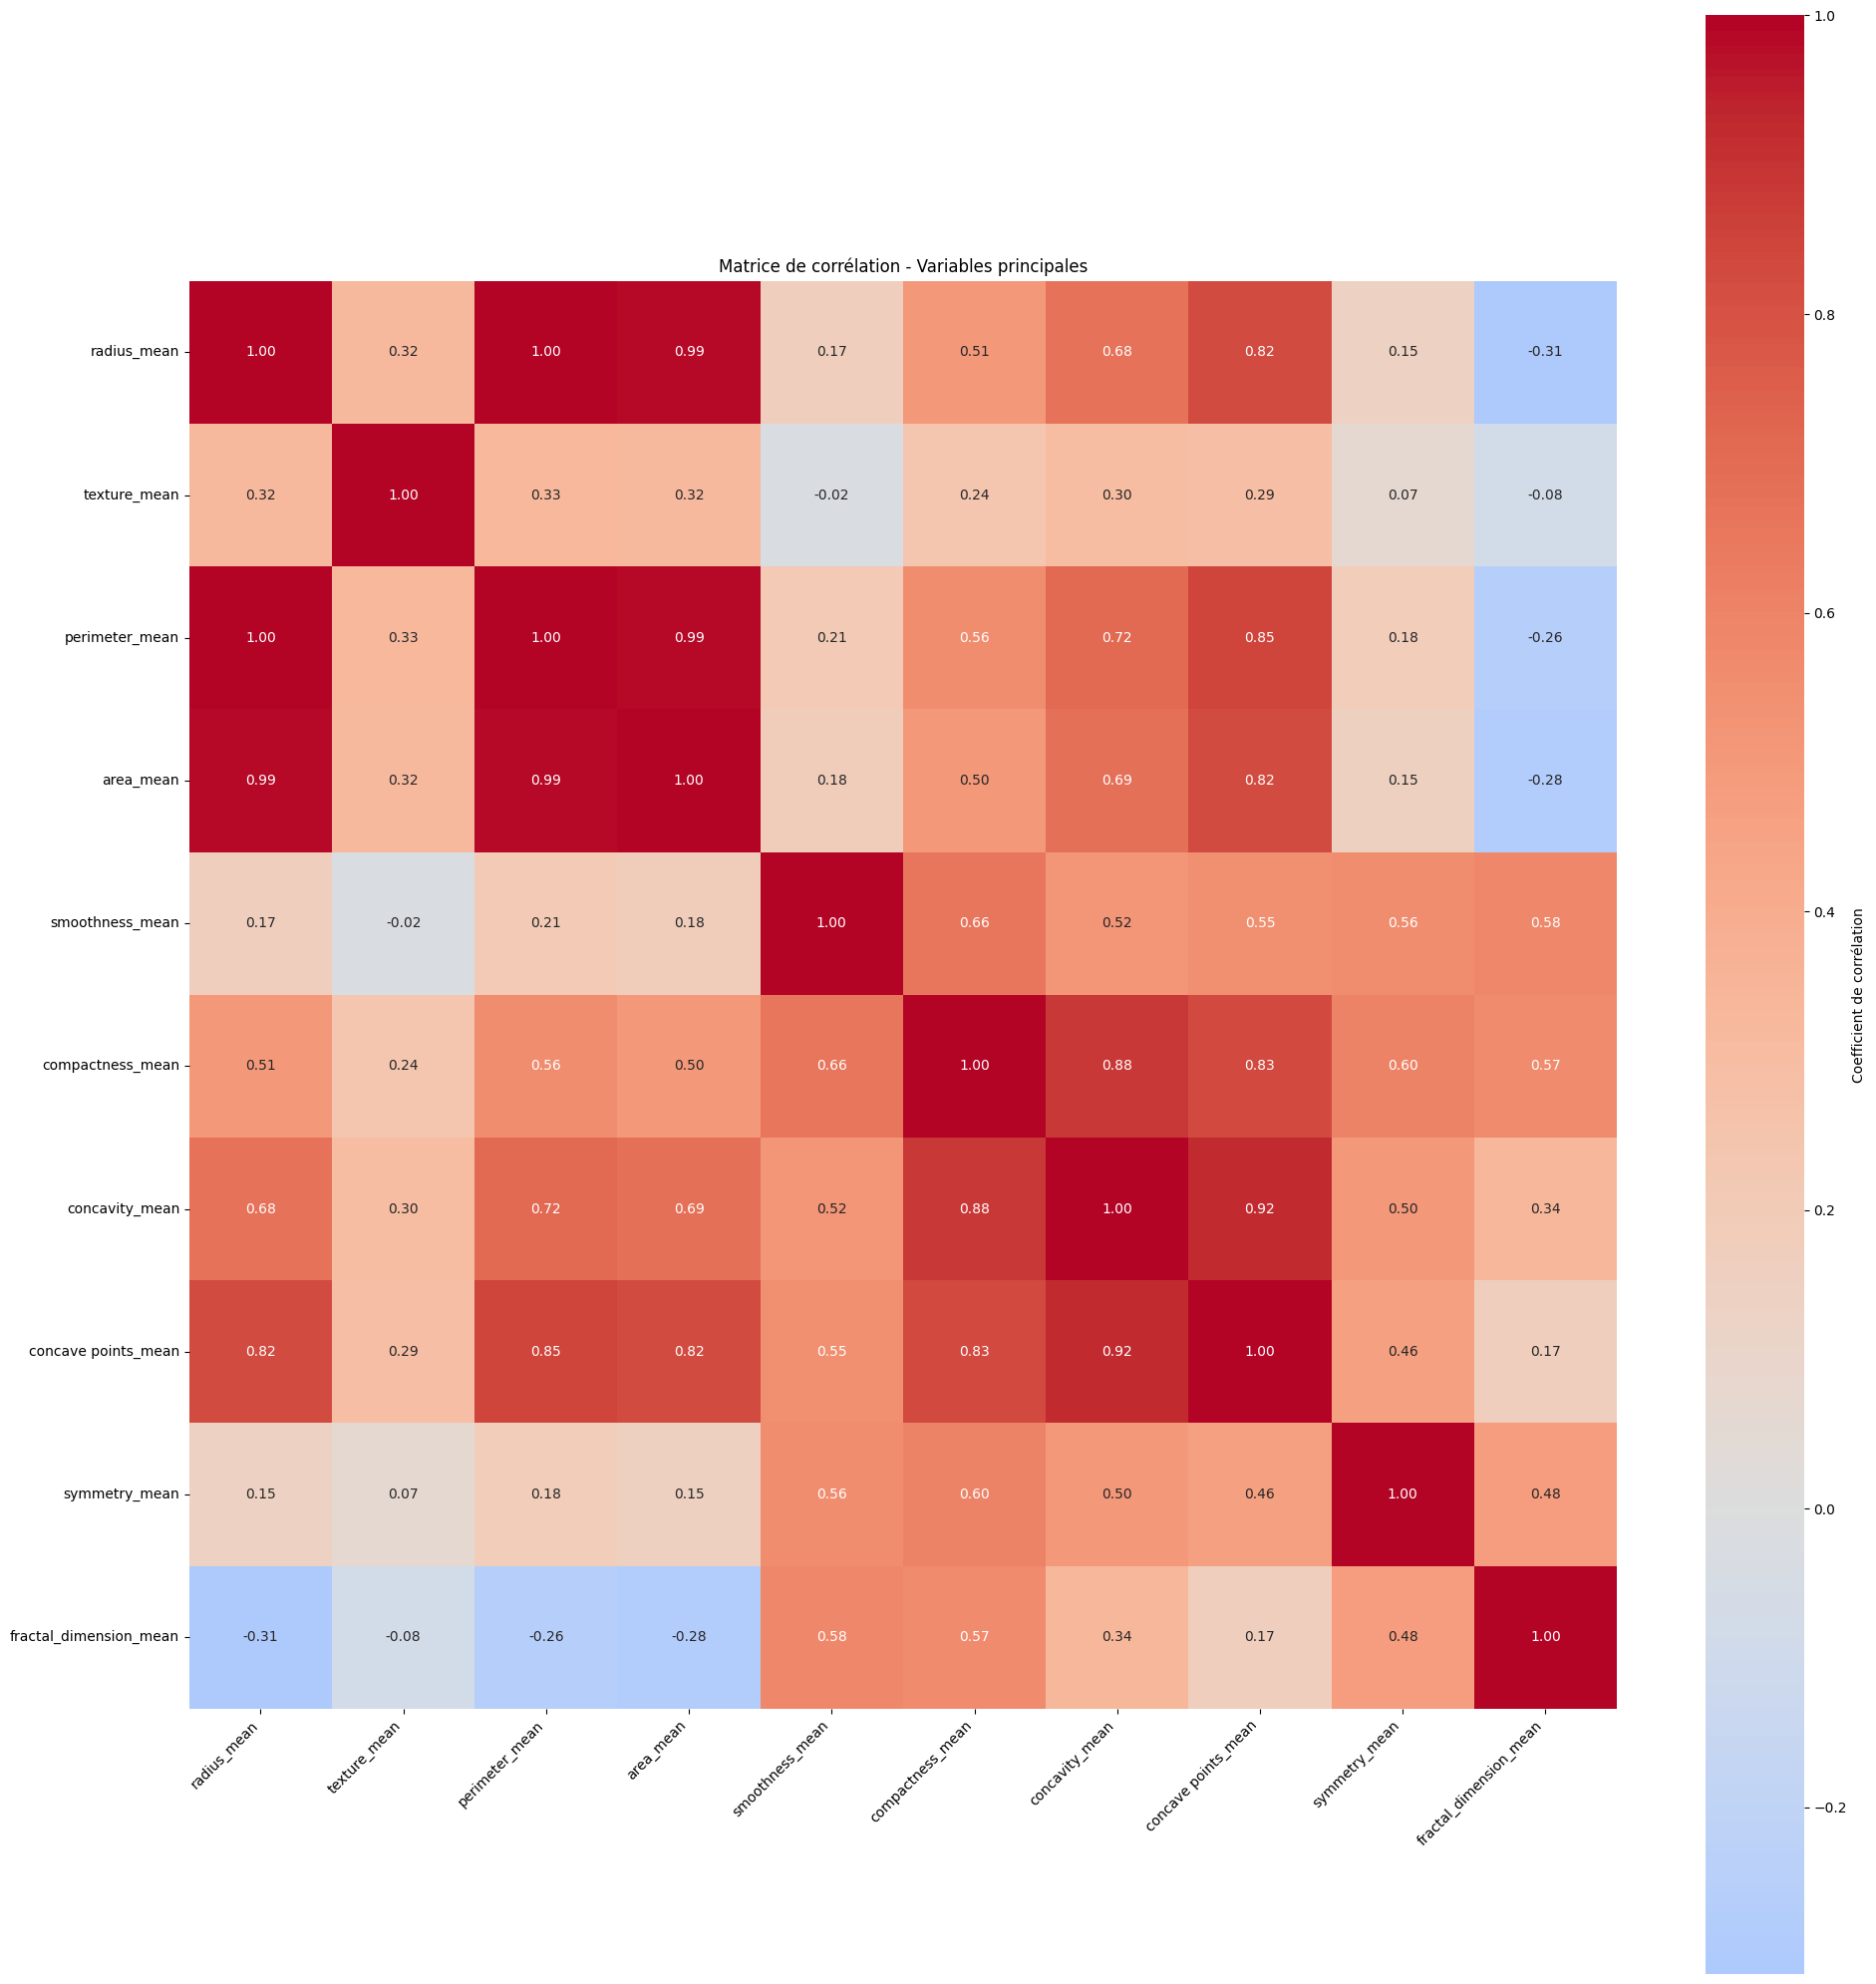

In [24]:
# 6. Analyse des corrélations
print("="*60)
print("🔗 ANALYSE DES CORRÉLATIONS")
print("="*60)

# Calculer la matrice de corrélation pour les variables numériques
numeric_df = df.select_dtypes(include=[np.number])
if 'id' in numeric_df.columns:
    numeric_df = numeric_df.drop('id', axis=1)

correlation_matrix = numeric_df.corr()

print(f"📊 Matrice de corrélation calculée pour {len(numeric_df.columns)} variables")

# Trouver les corrélations les plus fortes
def find_high_correlations(corr_matrix, threshold=0.8):
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr.append({
                    'Variable_1': corr_matrix.columns[i],
                    'Variable_2': corr_matrix.columns[j],
                    'Corrélation': round(corr_matrix.iloc[i, j], 3)
                })
    return sorted(high_corr, key=lambda x: abs(x['Corrélation']), reverse=True)

high_correlations = find_high_correlations(correlation_matrix, 0.7)
print(f"\n🔍 Corrélations fortes (|r| > 0.7): {len(high_correlations)} paires trouvées")

if high_correlations:
    high_corr_df = pd.DataFrame(high_correlations)
    print("\n📊 Top 10 des corrélations les plus fortes:")
    print(high_corr_df.head(40).to_string(index=False))

# Visualisation de la matrice de corrélation
plt.figure(figsize=(20, 20))

# Heatmap complète (réduite pour la lisibilité)
important_features = [col for col in numeric_df.columns if '_mean' in col][:10]
if len(important_features) < 10:
    important_features = numeric_df.columns[:15].tolist()

corr_subset = correlation_matrix.loc[important_features, important_features]

sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'label': 'Coefficient de corrélation'})
plt.title('Matrice de corrélation - Variables principales')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


📊 ANALYSE DES DISTRIBUTIONS


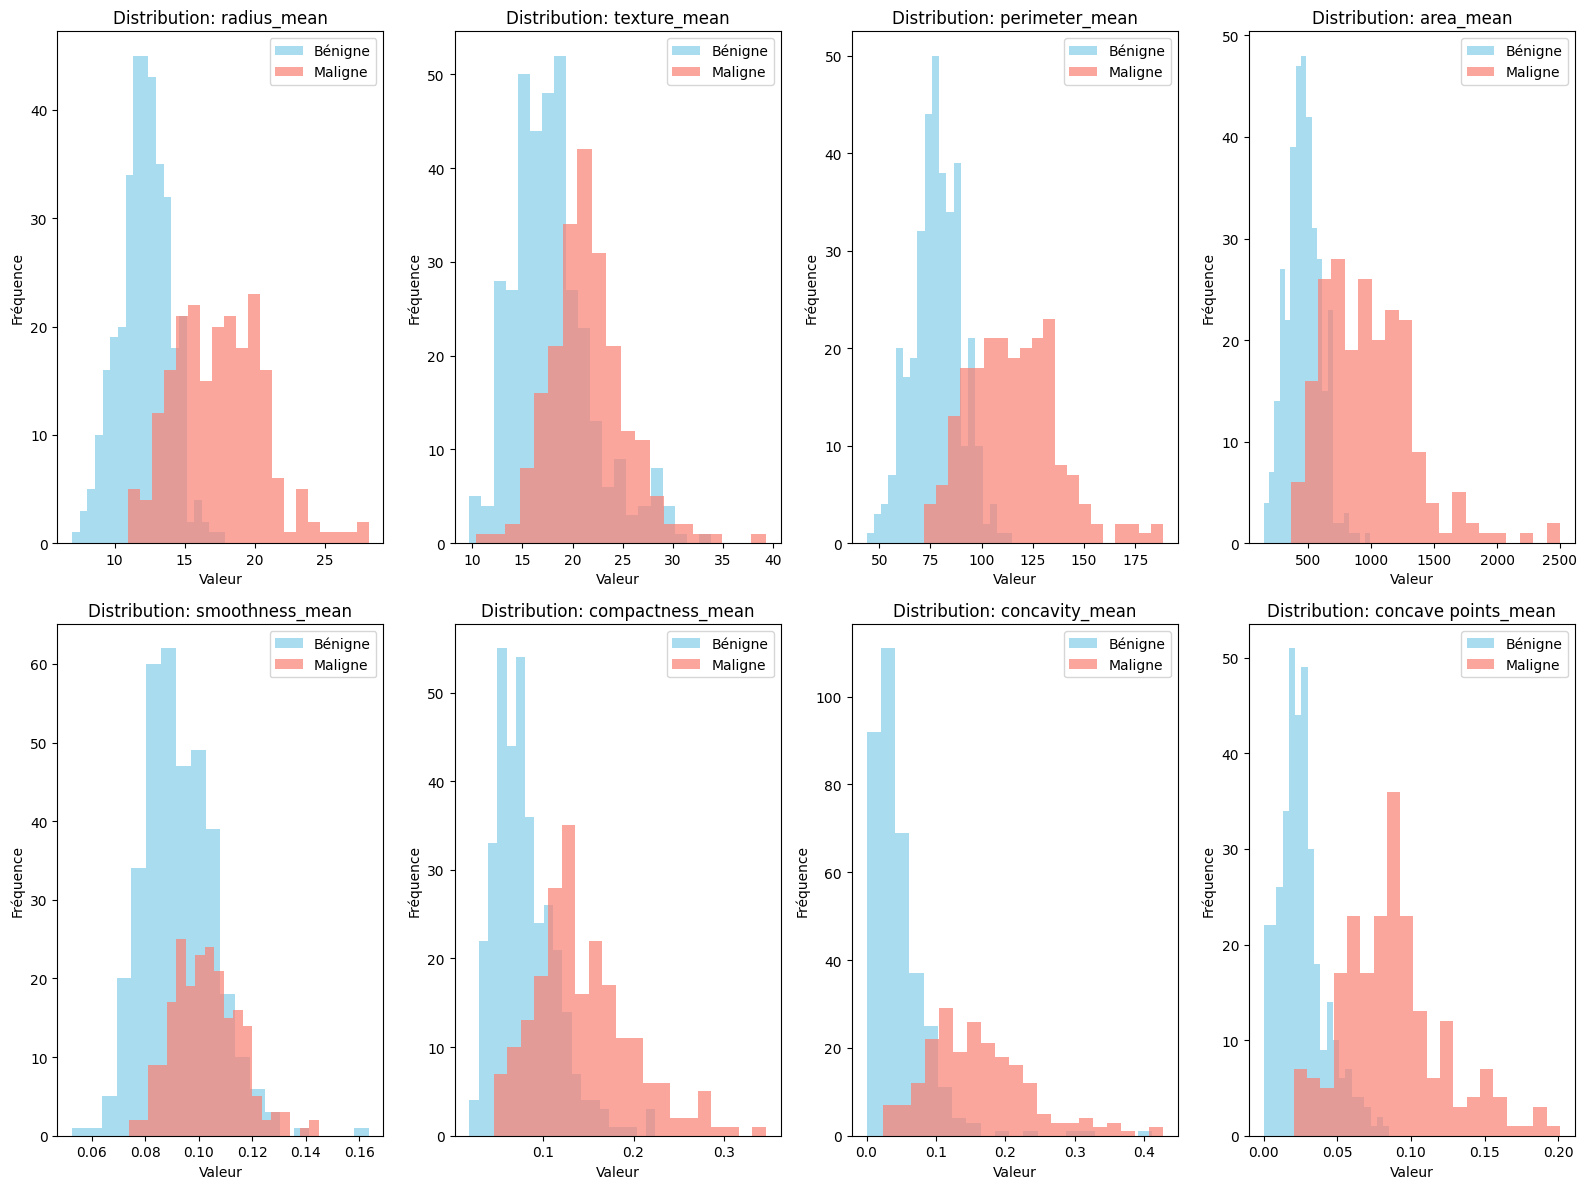


📈 Tests de normalité (Shapiro-Wilk) pour variables principales:
       Variable  Shapiro_stat  p_value Normal
    radius_mean        0.9411 0.000000    Non
   texture_mean        0.9767 0.000000    Non
 perimeter_mean        0.9362 0.000000    Non
      area_mean        0.8584 0.000000    Non
smoothness_mean        0.9875 0.000086    Non

📊 Variables suivant une loi normale: 0/5


In [25]:
# 7. Distribution des variables principales
print("="*60)
print("📊 ANALYSE DES DISTRIBUTIONS")
print("="*60)

# Analyser les distributions des variables les plus importantes
if 'diagnosis' in df.columns:
    # Variables _mean principales
    mean_vars = [col for col in df.columns if '_mean' in col][:8]

    plt.figure(figsize=(16, 12))

    for i, var in enumerate(mean_vars, 1):
        plt.subplot(2, 4, i)

        # Distribution par diagnostic
        if df[var].dtype in ['float64', 'int64']:
            benign = df[df['diagnosis'] == 'B'][var]
            malignant = df[df['diagnosis'] == 'M'][var]

            plt.hist(benign, alpha=0.7, label='Bénigne', bins=20, color='skyblue')
            plt.hist(malignant, alpha=0.7, label='Maligne', bins=20, color='salmon')
            plt.title(f'Distribution: {var}')
            plt.xlabel('Valeur')
            plt.ylabel('Fréquence')
            plt.legend()

    plt.tight_layout()
    plt.show()

    # Tests de normalité et statistiques
    print("\n📈 Tests de normalité (Shapiro-Wilk) pour variables principales:")
    from scipy import stats

    normality_results = []
    for var in mean_vars[:5]:  # Tester seulement les 5 premières pour éviter trop de calculs
        if df[var].dtype in ['float64', 'int64']:
            # Test de normalité
            stat, p_value = stats.shapiro(df[var].sample(min(5000, len(df))))  # Échantillon pour le test
            normality_results.append({
                'Variable': var,
                'Shapiro_stat': round(stat, 4),
                'p_value': round(p_value, 6),
                'Normal': 'Oui' if p_value > 0.05 else 'Non'
            })

    if normality_results:
        norm_df = pd.DataFrame(normality_results)
        print(norm_df.to_string(index=False))

        normal_vars = sum(1 for result in normality_results if result['Normal'] == 'Oui')
        print(f"\n📊 Variables suivant une loi normale: {normal_vars}/{len(normality_results)}")

else:
    print("❌ Variable 'diagnosis' non trouvée - analyse des distributions générales")

    # Distribution générale pour les premières variables numériques
    numeric_cols = df.select_dtypes(include=[np.number]).columns[:8]

    plt.figure(figsize=(16, 10))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(2, 4, i)
        df[col].hist(bins=20, alpha=0.7, color='lightblue')
        plt.title(f'Distribution: {col}')
        plt.xlabel('Valeur')
        plt.ylabel('Fréquence')

    plt.tight_layout()
    plt.show()

In [26]:
# 8. Résumé exécutif du Data Understanding
print("="*80)
print("📋 RÉSUMÉ EXÉCUTIF - DATA UNDERSTANDING")
print("="*80)

# Collecter les informations principales
dataset_info = {
    'Dimensions': f"{df.shape[0]} lignes × {df.shape[1]} colonnes",
    'Variables_numeriques': len(df.select_dtypes(include=[np.number]).columns),
    'Variables_categorielles': len(df.select_dtypes(include=['object']).columns),
    'Valeurs_manquantes_total': df.isnull().sum().sum(),
    'Pourcentage_complet': f"{((len(df) * len(df.columns) - df.isnull().sum().sum()) / (len(df) * len(df.columns)) * 100):.1f}%"
}

print("🔍 INFORMATIONS GÉNÉRALES:")
for key, value in dataset_info.items():
    print(f"• {key.replace('_', ' ').title()}: {value}")

if 'diagnosis' in df.columns:
    diagnosis_info = df['diagnosis'].value_counts()
    balance_ratio = min(diagnosis_info) / max(diagnosis_info)

    print(f"\n🎯 VARIABLE CIBLE (DIAGNOSIS):")
    print(f"• Classes: {list(diagnosis_info.index)}")
    print(f"• Distribution: {dict(diagnosis_info)}")
    print(f"• Équilibre des classes: {'Équilibré' if balance_ratio > 0.7 else 'Déséquilibré'} (ratio: {balance_ratio:.2f})")

# Analyse des features par type (mean, se, worst)
feature_types = {'_mean': 0, '_se': 0, '_worst': 0}
for col in df.columns:
    for feat_type in feature_types.keys():
        if feat_type in col:
            feature_types[feat_type] += 1

print(f"\n📊 TYPES DE FEATURES:")
for feat_type, count in feature_types.items():
    if count > 0:
        print(f"• Features {feat_type}: {count}")

# Recommandations pour la suite
print(f"\n💡 RECOMMANDATIONS POUR LA SUITE:")

recommendations = []

if df.isnull().sum().sum() == 0:
    recommendations.append("✅ Aucun preprocessing pour les valeurs manquantes nécessaire")
else:
    recommendations.append("⚠️  Traitement des valeurs manquantes requis")

if 'diagnosis' in df.columns and balance_ratio < 0.7:
    recommendations.append("⚠️  Considérer des techniques de rééquilibrage des classes")

if len(high_correlations) > 10:
    recommendations.append("🔄 Considérer la réduction de dimensionnalité (PCA) ou sélection de features")

numeric_vars = len(df.select_dtypes(include=[np.number]).columns)
if numeric_vars > 10:
    recommendations.append("📊 Standardisation/Normalisation recommandée pour les modèles ML")

recommendations.append("🎯 Prêt pour la phase de Data Preparation et Modeling")

for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")


📋 RÉSUMÉ EXÉCUTIF - DATA UNDERSTANDING
🔍 INFORMATIONS GÉNÉRALES:
• Dimensions: 569 lignes × 33 colonnes
• Variables Numeriques: 32
• Variables Categorielles: 1
• Valeurs Manquantes Total: 569
• Pourcentage Complet: 97.0%

🎯 VARIABLE CIBLE (DIAGNOSIS):
• Classes: ['B', 'M']
• Distribution: {'B': np.int64(357), 'M': np.int64(212)}
• Équilibre des classes: Déséquilibré (ratio: 0.59)

📊 TYPES DE FEATURES:
• Features _mean: 10
• Features _se: 10
• Features _worst: 10

💡 RECOMMANDATIONS POUR LA SUITE:
1. ⚠️  Traitement des valeurs manquantes requis
2. ⚠️  Considérer des techniques de rééquilibrage des classes
3. 🔄 Considérer la réduction de dimensionnalité (PCA) ou sélection de features
4. 📊 Standardisation/Normalisation recommandée pour les modèles ML
5. 🎯 Prêt pour la phase de Data Preparation et Modeling


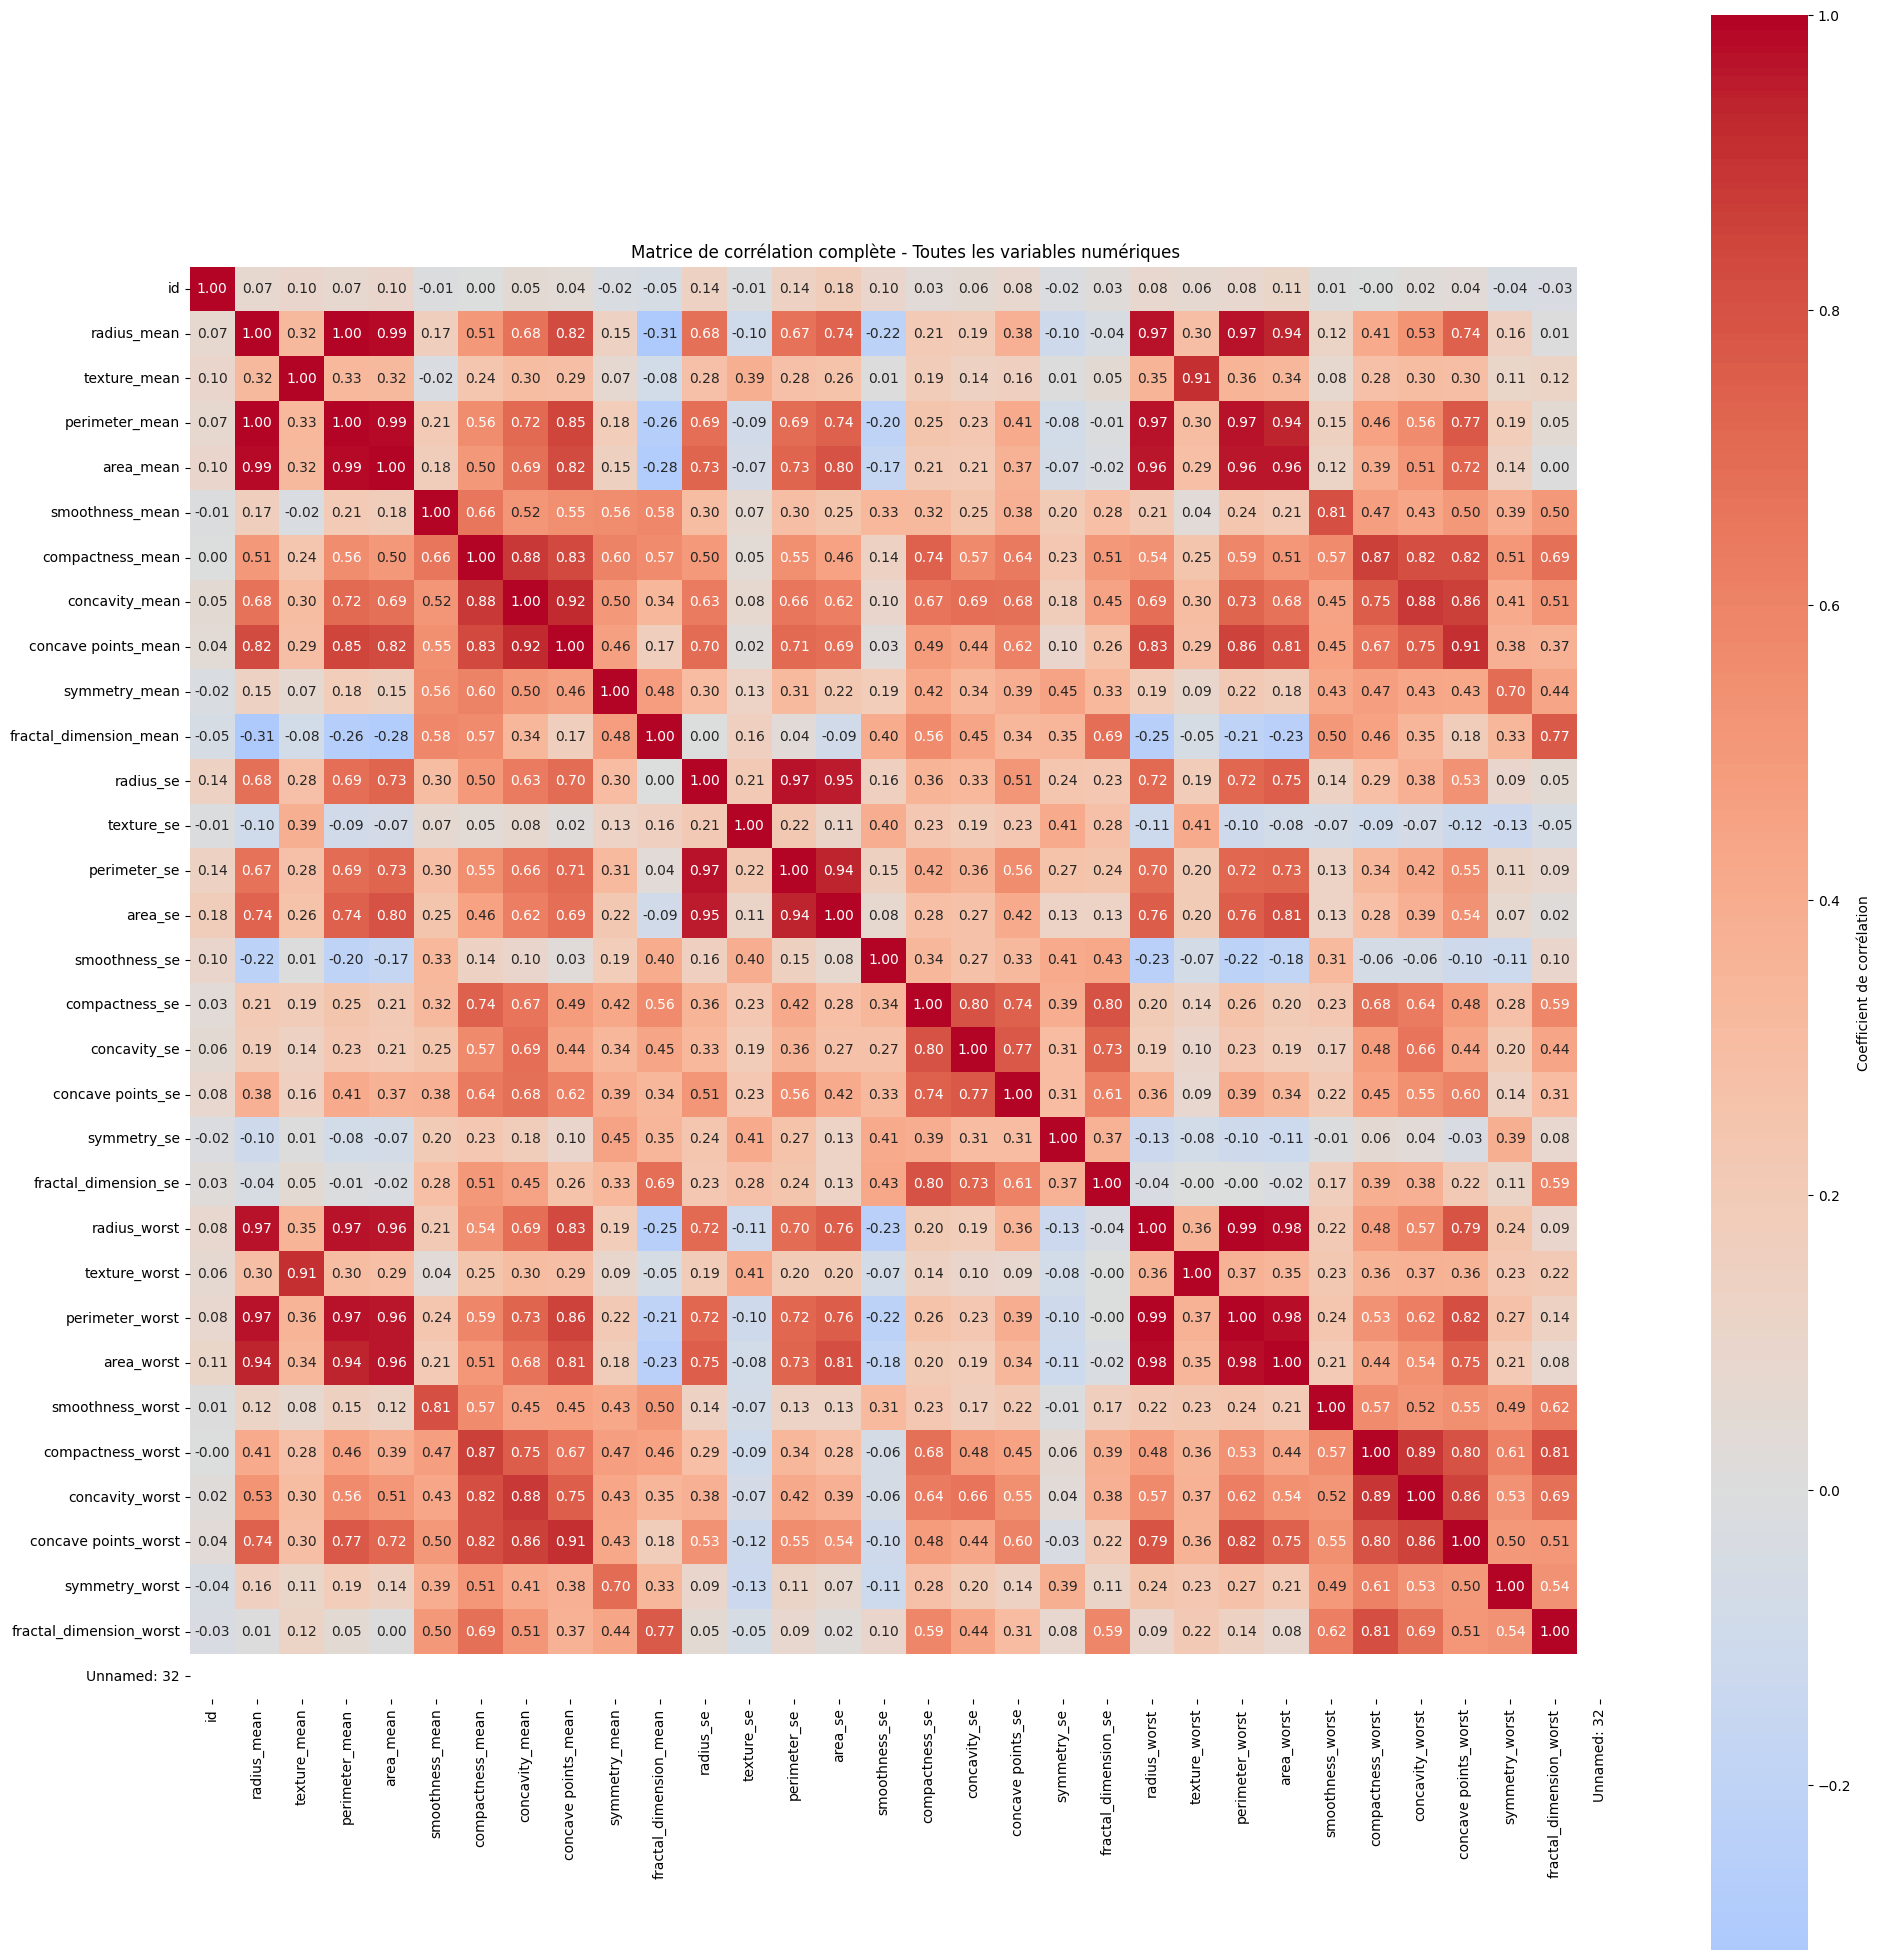

In [27]:
plt.figure(figsize=(20,20))

# Sélectionner seulement les colonnes numériques (exclure 'diagnosis' qui est de type object)
numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'label': 'Coefficient de corrélation'})
plt.title('Matrice de corrélation complète - Toutes les variables numériques')
plt.tight_layout()
plt.show()

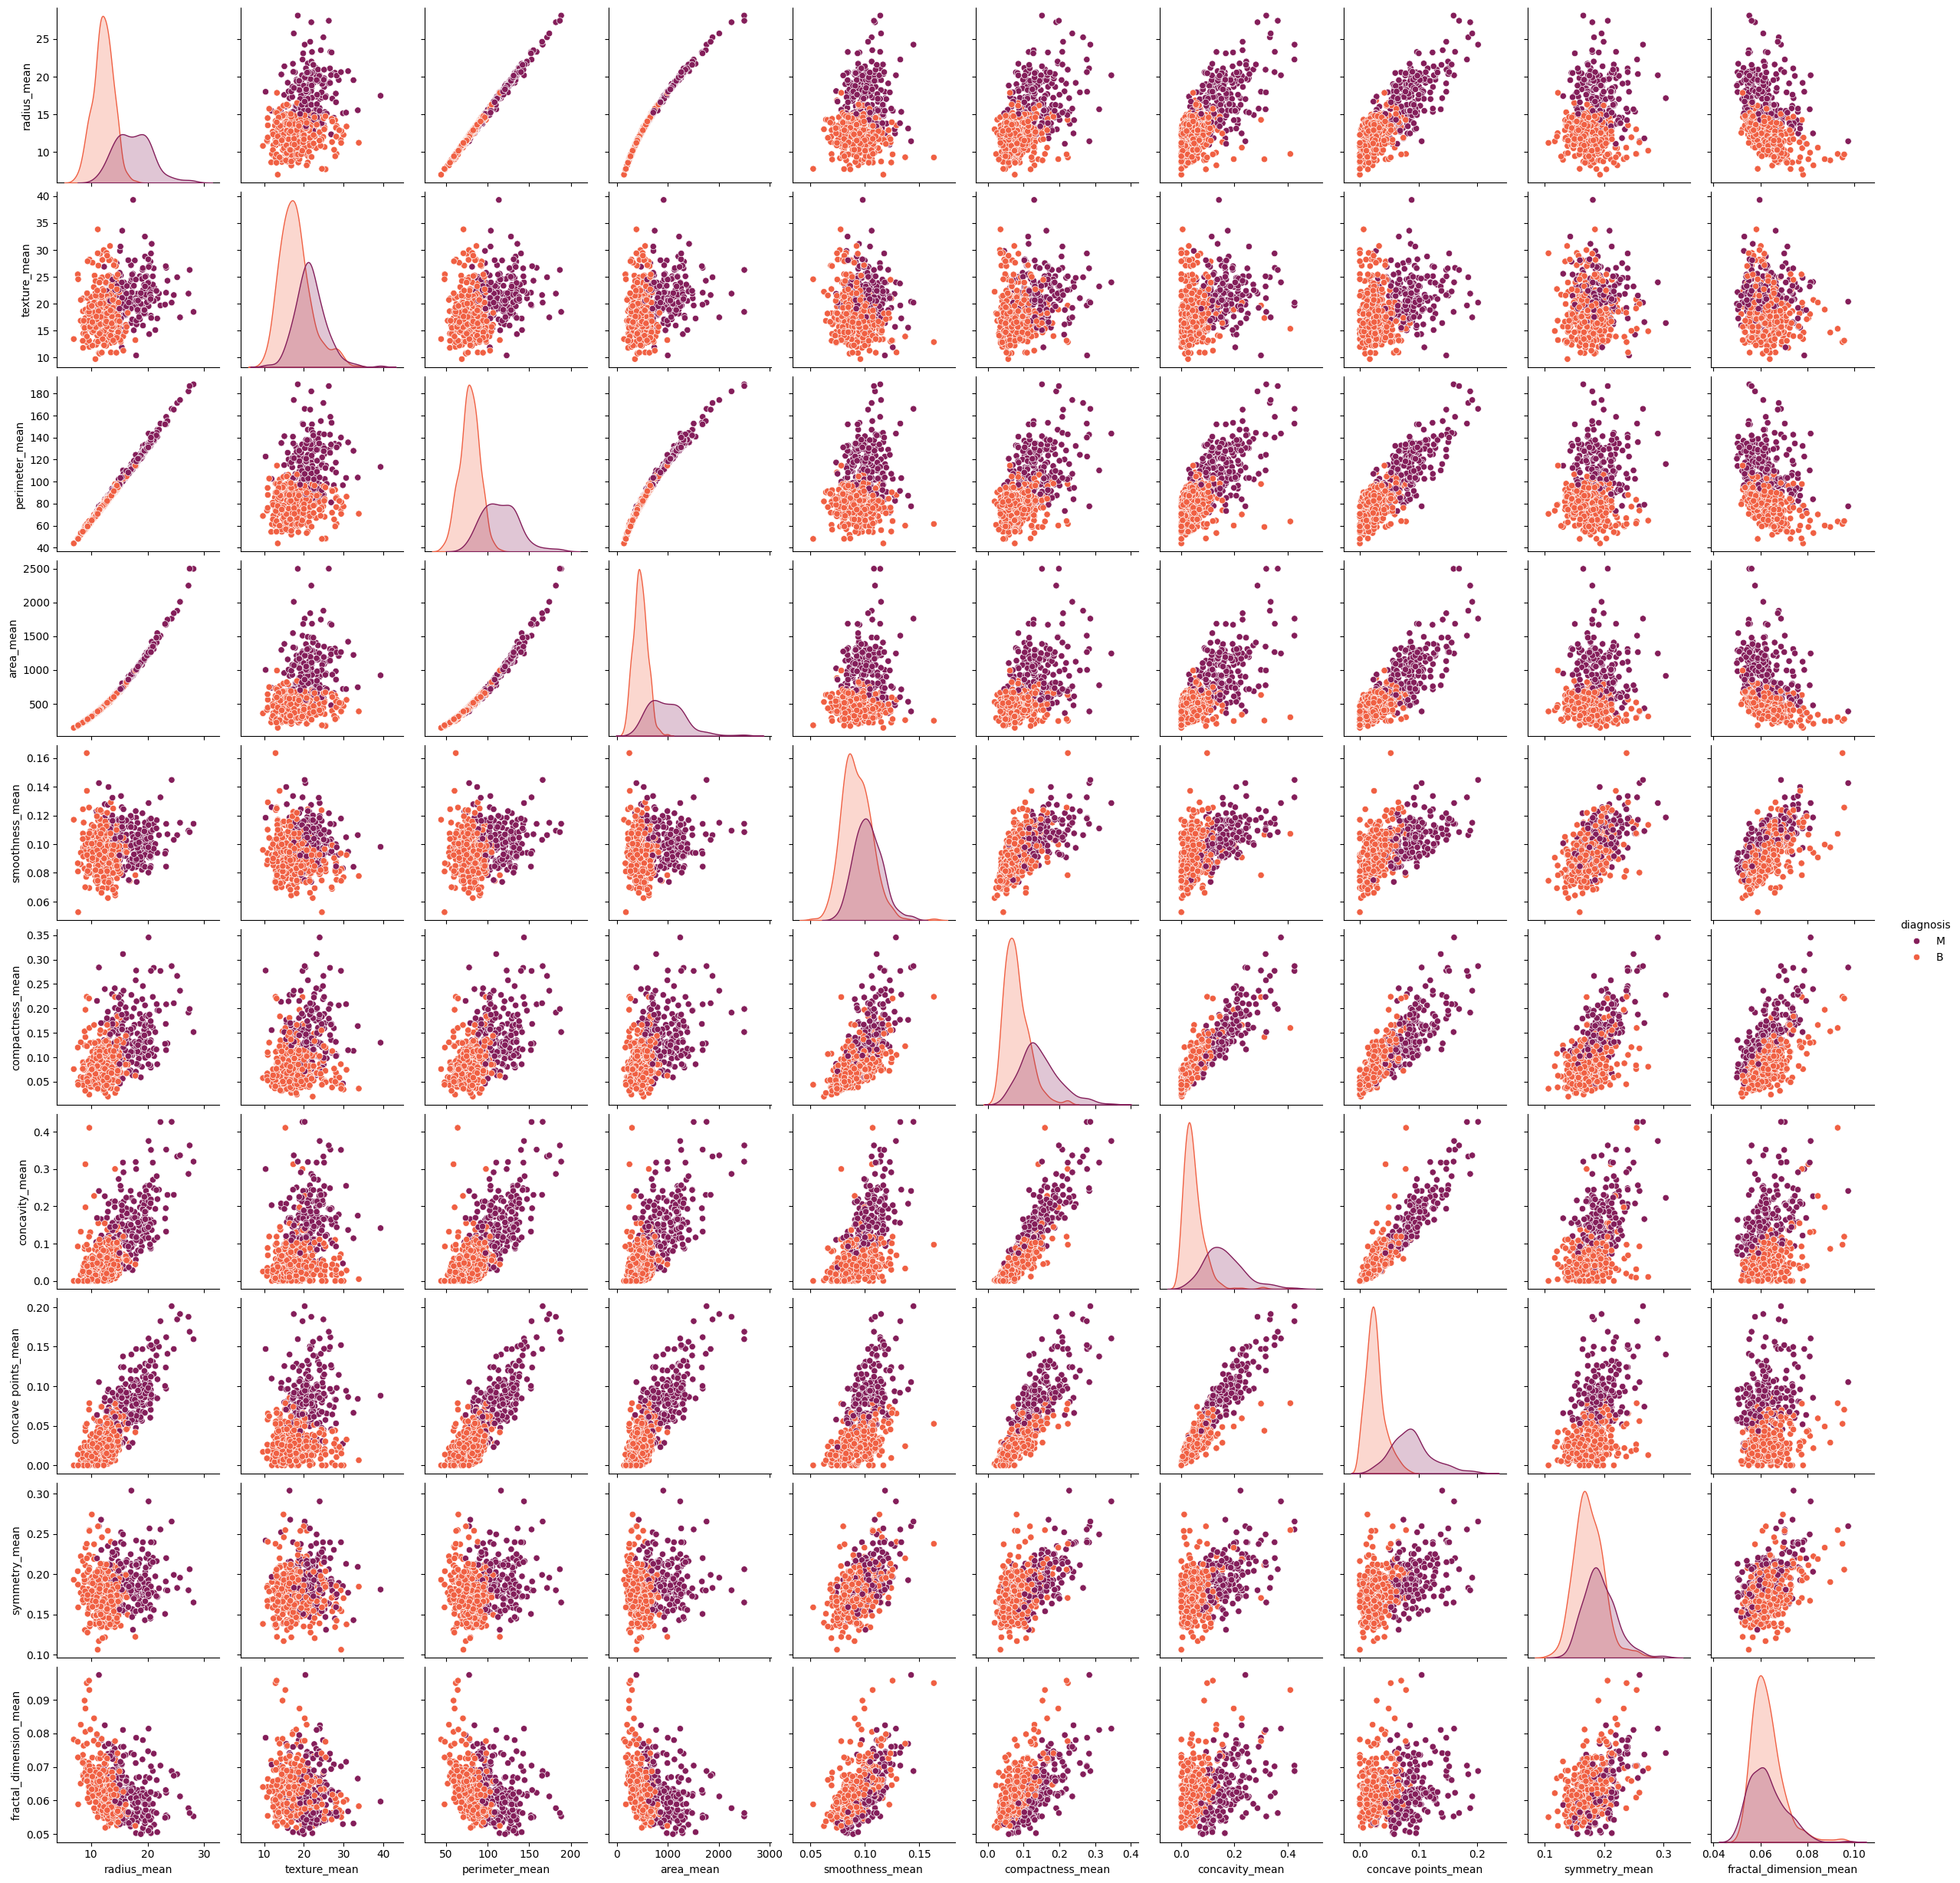

In [28]:
cols = ['diagnosis',
        'radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='rocket')

# 🛠️ **Étape 3 — Data Preparation**


In [29]:
# Suppression des colonnes inutiles
print("\n🗑️ Suppression des colonnes 'id' et 'Unnamed: 32'...")

# Vérifier si les colonnes existent avant de les supprimer
columns_to_drop = []
if 'id' in df.columns:
    columns_to_drop.append('id')
if 'Unnamed: 32' in df.columns:
    columns_to_drop.append('Unnamed: 32')

if columns_to_drop:
    df = df.drop(columns=columns_to_drop)
    print(f"📊 Nouvelles dimensions: {df.shape[0]} lignes et {df.shape[1]} colonnes")
else:
    print("⚠️ Aucune des colonnes spécifiées n'a été trouvée dans le dataset")




🗑️ Suppression des colonnes 'id' et 'Unnamed: 32'...
📊 Nouvelles dimensions: 569 lignes et 31 colonnes


In [30]:
# Encodage de la variable cible
from sklearn.preprocessing import LabelEncoder

print("="*60)
print("🔄 ENCODAGE DE LA VARIABLE CIBLE")
print("="*60)

# Encoder diagnosis: M (Maligne) -> 1, B (Bénigne) -> 0
label_encoder = LabelEncoder()
df['diagnosis_encoded'] = label_encoder.fit_transform(df['diagnosis'])

print(f"✅ Encodage effectué:")
print(f"   • M (Maligne) → 1")
print(f"   • B (Bénigne) → 0")
print(f"\n📊 Distribution après encodage:")
print(df['diagnosis_encoded'].value_counts().sort_index())

# Vérification
print(f"\n🔍 Vérification:")
print(df[['diagnosis', 'diagnosis_encoded']].head())

🔄 ENCODAGE DE LA VARIABLE CIBLE
✅ Encodage effectué:
   • M (Maligne) → 1
   • B (Bénigne) → 0

📊 Distribution après encodage:
diagnosis_encoded
0    357
1    212
Name: count, dtype: int64

🔍 Vérification:
  diagnosis  diagnosis_encoded
0         M                  1
1         M                  1
2         M                  1
3         M                  1
4         M                  1


In [31]:
# Séparation des features (X) et de la cible (y)
print("="*60)
print("🎯 SÉPARATION FEATURES ET CIBLE")
print("="*60)

# Séparer X et y
X = df.drop(['diagnosis', 'diagnosis_encoded'], axis=1)
y = df['diagnosis_encoded']

print(f"✅ Séparation effectuée:")
print(f"   • X (features): {X.shape}")
print(f"   • y (cible): {y.shape}")
print(f"\n📊 Distribution de y:")
print(y.value_counts())

print(f"\n📋 Features utilisées ({len(X.columns)}):")
for i, col in enumerate(X.columns, 1):
    print(f"   {i}. {col}")

🎯 SÉPARATION FEATURES ET CIBLE
✅ Séparation effectuée:
   • X (features): (569, 30)
   • y (cible): (569,)

📊 Distribution de y:
diagnosis_encoded
0    357
1    212
Name: count, dtype: int64

📋 Features utilisées (30):
   1. radius_mean
   2. texture_mean
   3. perimeter_mean
   4. area_mean
   5. smoothness_mean
   6. compactness_mean
   7. concavity_mean
   8. concave points_mean
   9. symmetry_mean
   10. fractal_dimension_mean
   11. radius_se
   12. texture_se
   13. perimeter_se
   14. area_se
   15. smoothness_se
   16. compactness_se
   17. concavity_se
   18. concave points_se
   19. symmetry_se
   20. fractal_dimension_se
   21. radius_worst
   22. texture_worst
   23. perimeter_worst
   24. area_worst
   25. smoothness_worst
   26. compactness_worst
   27. concavity_worst
   28. concave points_worst
   29. symmetry_worst
   30. fractal_dimension_worst


📊 NORMALISATION DES DONNÉES
✅ Normalisation effectuée avec StandardScaler
   Formule: X_std = (X - μ) / σ

📊 Statistiques avant normalisation:
   • Moyenne radius_mean: 14.13
   • Écart-type radius_mean: 3.52

📊 Statistiques après normalisation:
   • Moyenne radius_mean: -1.37e-16
   • Écart-type radius_mean: 1.00


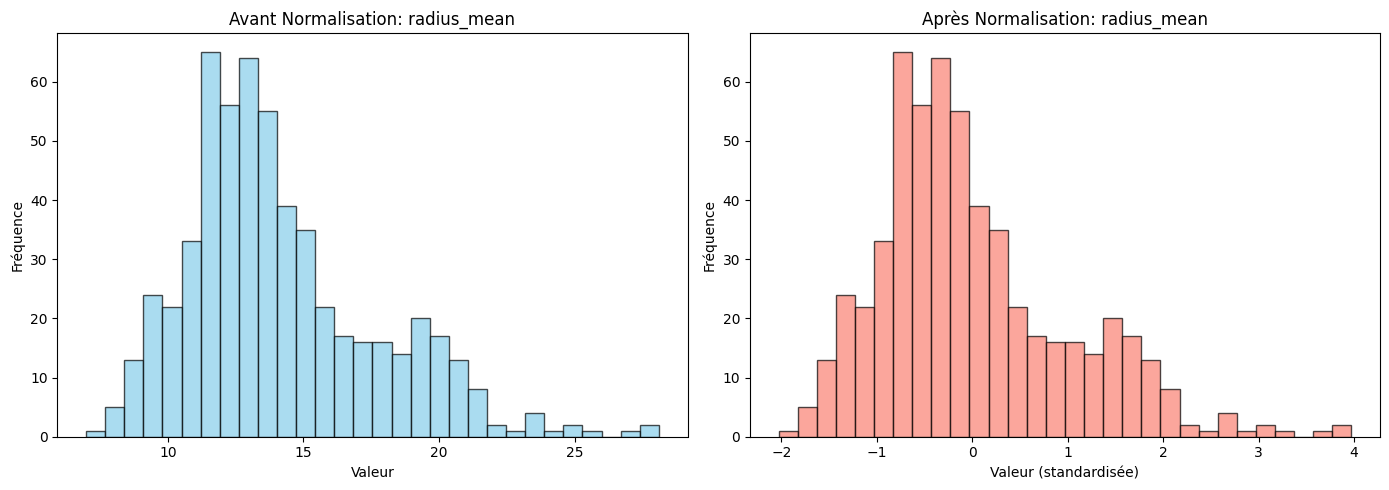


✅ Les données sont maintenant centrées (μ=0) et réduites (σ=1)


In [6]:
# Normalisation des données avec StandardScaler
from sklearn.preprocessing import StandardScaler

print("="*60)
print("📊 NORMALISATION DES DONNÉES")
print("="*60)

# Initialiser le StandardScaler
scaler = StandardScaler()

# Fit et transform sur X
X_scaled = scaler.fit_transform(X)

# Convertir en DataFrame pour garder les noms de colonnes
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"✅ Normalisation effectuée avec StandardScaler")
print(f"   Formule: X_std = (X - μ) / σ")
print(f"\n📊 Statistiques avant normalisation:")
print(f"   • Moyenne radius_mean: {X['radius_mean'].mean():.2f}")
print(f"   • Écart-type radius_mean: {X['radius_mean'].std():.2f}")

print(f"\n📊 Statistiques après normalisation:")
print(f"   • Moyenne radius_mean: {X_scaled_df['radius_mean'].mean():.2e}")
print(f"   • Écart-type radius_mean: {X_scaled_df['radius_mean'].std():.2f}")

# Visualisation de l'effet de la normalisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Avant normalisation
axes[0].hist(X['radius_mean'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Avant Normalisation: radius_mean')
axes[0].set_xlabel('Valeur')
axes[0].set_ylabel('Fréquence')

# Après normalisation
axes[1].hist(X_scaled_df['radius_mean'], bins=30, alpha=0.7, color='salmon', edgecolor='black')
axes[1].set_title('Après Normalisation: radius_mean')
axes[1].set_xlabel('Valeur (standardisée)')
axes[1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

print("\n✅ Les données sont maintenant centrées (μ=0) et réduites (σ=1)")

✂️ PARTITION DU DATASET
✅ Partition effectuée:

📊 Training Set (70%):
   • X_train: (398, 30)
   • y_train: (398,)
   • Distribution:
      - Bénigne (0): 250 (62.8%)
      - Maligne (1): 148 (37.2%)

📊 Testing Set (30%):
   • X_test: (171, 30)
   • y_test: (171,)
   • Distribution:
      - Bénigne (0): 107 (62.6%)
      - Maligne (1): 64 (37.4%)


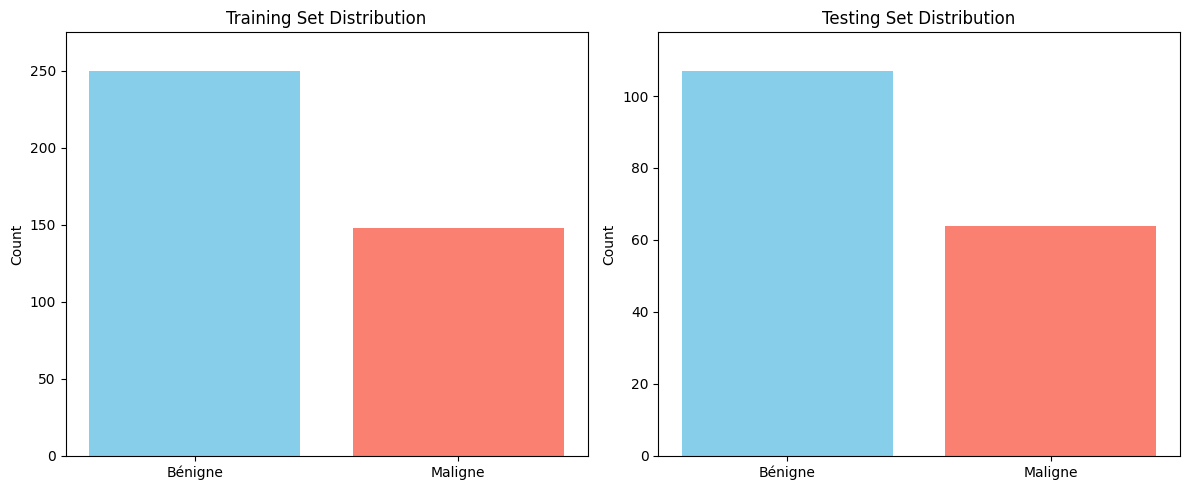


✅ Stratification appliquée: les proportions de classes sont préservées


In [7]:
# Partition du dataset: 70% Training, 30% Testing
from sklearn.model_selection import train_test_split

print("="*60)
print("✂️ PARTITION DU DATASET")
print("="*60)

# Split stratifié pour maintenir la proportion des classes
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print(f"✅ Partition effectuée:")
print(f"\n📊 Training Set (70%):")
print(f"   • X_train: {X_train.shape}")
print(f"   • y_train: {y_train.shape}")
print(f"   • Distribution:")
for label, count in y_train.value_counts().sort_index().items():
    label_name = 'Bénigne' if label == 0 else 'Maligne'
    print(f"      - {label_name} ({label}): {count} ({count/len(y_train)*100:.1f}%)")

print(f"\n📊 Testing Set (30%):")
print(f"   • X_test: {X_test.shape}")
print(f"   • y_test: {y_test.shape}")
print(f"   • Distribution:")
for label, count in y_test.value_counts().sort_index().items():
    label_name = 'Bénigne' if label == 0 else 'Maligne'
    print(f"      - {label_name} ({label}): {count} ({count/len(y_test)*100:.1f}%)")

# Visualisation de la partition
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training set
axes[0].bar(['Bénigne', 'Maligne'], y_train.value_counts().sort_index(), color=['skyblue', 'salmon'])
axes[0].set_title('Training Set Distribution')
axes[0].set_ylabel('Count')
axes[0].set_ylim(0, max(y_train.value_counts()) * 1.1)

# Testing set
axes[1].bar(['Bénigne', 'Maligne'], y_test.value_counts().sort_index(), color=['skyblue', 'salmon'])
axes[1].set_title('Testing Set Distribution')
axes[1].set_ylabel('Count')
axes[1].set_ylim(0, max(y_test.value_counts()) * 1.1)

plt.tight_layout()
plt.show()

print("\n✅ Stratification appliquée: les proportions de classes sont préservées")

# 🤖 **Étape 4 — Modeling**

## 📋 **Vue d'ensemble des modèles**

Dans cette section, nous allons implémenter et comparer **6 modèles** différents pour la classification binaire:

### **Machine Learning Classique**
1. **K-Nearest Neighbors (KNN)** - Approche géométrique (distances L1 et L2)
2. **Support Vector Machine (SVM-L2)** - Classification par hyperplan optimal
3. **Softmax Regression** - Généralisation de la régression logistique

### **Deep Learning**
4. **Linear Regression** (adapté pour classification) - Baseline avec seuillage
5. **Multilayer Perceptron (MLP)** - Réseau profond à 3 couches cachées (500-500-500)
6. **GRU-SVM Hybride** - Combinaison GRU + SVM pour approche innovante

---

## 🎯 **Objectifs**
- Comparer les performances de chaque modèle
- Identifier le meilleur modèle pour le diagnostic du cancer du sein
- Analyser les métriques: Accuracy, TPR, TNR, FPR, FNR
- Améliorer les résultats de la recherche existante (baseline: 99.04%)

---

In [8]:
!pip install tensorflow

In [9]:
# Import des bibliothèques pour le modeling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from sklearn.linear_model import LogisticRegression
import time

print("="*60)
print("📦 IMPORTS POUR LE MODELING")
print("="*60)
print(f"✅ TensorFlow version: {tf.__version__}")
print(f"✅ Scikit-learn importé")
print("\n🎯 Bibliothèques prêtes pour la modélisation")

# Fonction pour calculer les métriques détaillées
def calculate_metrics(y_true, y_pred, model_name="Model"):
    """
    Calcule toutes les métriques de classification
    """
    # Matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Métriques
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # TPR, TNR, FPR, FNR
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Sensibilité / Recall
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0  # Spécificité
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # Taux de faux positifs
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0  # Taux de faux négatifs

    metrics = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'TPR (Sensitivity)': tpr,
        'TNR (Specificity)': tnr,
        'FPR': fpr,
        'FNR': fnr,
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn
    }

    return metrics, cm

print("\n✅ Fonction calculate_metrics() définie")

📦 IMPORTS POUR LE MODELING
✅ TensorFlow version: 2.19.0
✅ Scikit-learn importé

🎯 Bibliothèques prêtes pour la modélisation

✅ Fonction calculate_metrics() définie


## 🔵 **Modèle 1: K-Nearest Neighbors (KNN)**

### Description
- Algorithme géométrique basé sur la distance
- Pas d'entraînement (lazy learning)
- Test avec distances L1 (Manhattan) et L2 (Euclidienne)

### Hyperparamètres
- k = 5 voisins
- Distance: L1 et L2

🔵 MODÈLE 1: K-NEAREST NEIGHBORS (KNN)

📊 KNN avec distance L2 (Euclidienne)...
✅ KNN-L2 entraîné en 0.0105s
   • Accuracy: 96.49%
   • TPR (Sensibilité): 90.62%
   • TNR (Spécificité): 100.00%

📊 KNN avec distance L1 (Manhattan)...
✅ KNN-L1 entraîné en 0.0072s
   • Accuracy: 97.08%
   • TPR (Sensibilité): 92.19%
   • TNR (Spécificité): 100.00%


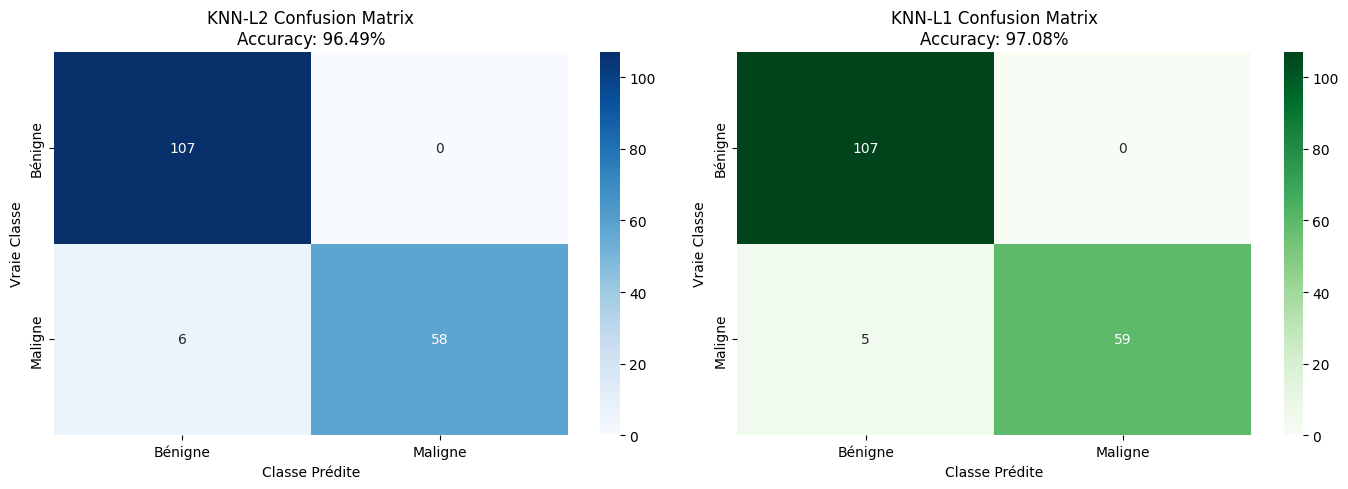


✅ KNN MODELS COMPLETED


In [44]:
print("="*80)
print("🔵 MODÈLE 1: K-NEAREST NEIGHBORS (KNN)")
print("="*80)

# Dictionnaire pour stocker les résultats
knn_results = {}

# KNN avec distance L2 (Euclidienne)
print("\n📊 KNN avec distance L2 (Euclidienne)...")
start_time = time.time()

knn_l2 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_l2.fit(X_train, y_train)
y_pred_knn_l2 = knn_l2.predict(X_test)

train_time_l2 = time.time() - start_time

metrics_l2, cm_l2 = calculate_metrics(y_test, y_pred_knn_l2, "KNN-L2")
knn_results['KNN-L2'] = metrics_l2

print(f"✅ KNN-L2 entraîné en {train_time_l2:.4f}s")
print(f"   • Accuracy: {metrics_l2['Accuracy']*100:.2f}%")
print(f"   • TPR (Sensibilité): {metrics_l2['TPR (Sensitivity)']*100:.2f}%")
print(f"   • TNR (Spécificité): {metrics_l2['TNR (Specificity)']*100:.2f}%")

# KNN avec distance L1 (Manhattan)
print("\n📊 KNN avec distance L1 (Manhattan)...")
start_time = time.time()

knn_l1 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_l1.fit(X_train, y_train)
y_pred_knn_l1 = knn_l1.predict(X_test)

train_time_l1 = time.time() - start_time

metrics_l1, cm_l1 = calculate_metrics(y_test, y_pred_knn_l1, "KNN-L1")
knn_results['KNN-L1'] = metrics_l1

print(f"✅ KNN-L1 entraîné en {train_time_l1:.4f}s")
print(f"   • Accuracy: {metrics_l1['Accuracy']*100:.2f}%")
print(f"   • TPR (Sensibilité): {metrics_l1['TPR (Sensitivity)']*100:.2f}%")
print(f"   • TNR (Spécificité): {metrics_l1['TNR (Specificity)']*100:.2f}%")

# Visualisation des matrices de confusion
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KNN-L2
sns.heatmap(cm_l2, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Bénigne', 'Maligne'], yticklabels=['Bénigne', 'Maligne'])
axes[0].set_title(f'KNN-L2 Confusion Matrix\nAccuracy: {metrics_l2["Accuracy"]*100:.2f}%')
axes[0].set_ylabel('Vraie Classe')
axes[0].set_xlabel('Classe Prédite')

# KNN-L1
sns.heatmap(cm_l1, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Bénigne', 'Maligne'], yticklabels=['Bénigne', 'Maligne'])
axes[1].set_title(f'KNN-L1 Confusion Matrix\nAccuracy: {metrics_l1["Accuracy"]*100:.2f}%')
axes[1].set_ylabel('Vraie Classe')
axes[1].set_xlabel('Classe Prédite')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ KNN MODELS COMPLETED")
print("="*80)

## 🟣 **Modèle 2: Support Vector Machine (SVM-L2)**

### Description
- Classification par hyperplan optimal avec marge maximale
- Version L2 (différentiable et plus stable que L1)
- Kernel RBF pour capturer les non-linéarités

### Hyperparamètres
- Kernel: RBF (Radial Basis Function)
- C = 1.0 (régularisation)
- gamma = 'scale'

🟣 MODÈLE 2: SUPPORT VECTOR MACHINE (SVM-L2)

📊 Entraînement du SVM avec kernel RBF...
✅ SVM-L2 entraîné en 0.0127s

📊 Performances:
   • Accuracy: 96.49%
   • Precision: 100.00%
   • Recall: 90.62%
   • F1-Score: 95.08%
   • TPR (Sensibilité): 90.62%
   • TNR (Spécificité): 100.00%
   • FPR: 0.00%
   • FNR: 9.38%

📊 Support Vectors:
   • Nombre de support vectors: 99
   • Classe 0 (Bénigne): 49
   • Classe 1 (Maligne): 50


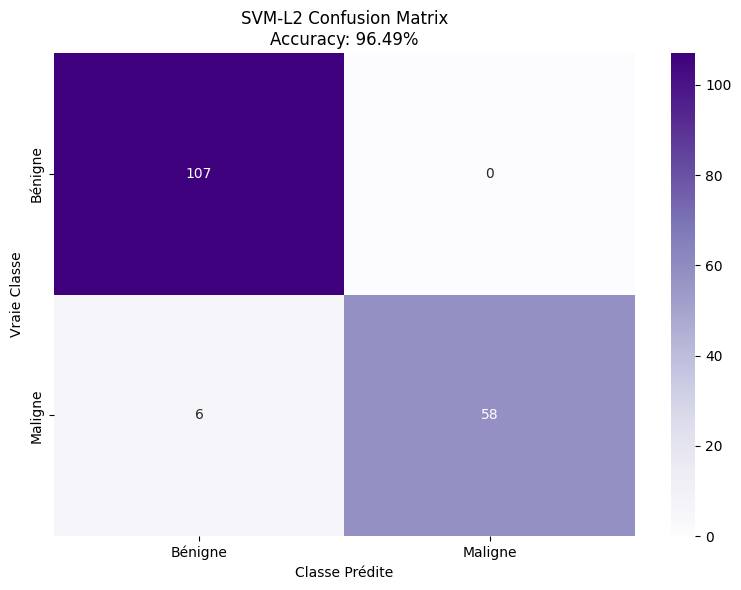


✅ SVM MODEL COMPLETED


In [11]:
print("="*80)
print("🟣 MODÈLE 2: SUPPORT VECTOR MACHINE (SVM-L2)")
print("="*80)

print("\n📊 Entraînement du SVM avec kernel RBF...")
start_time = time.time()

# SVM avec kernel RBF
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Prédictions
y_pred_svm = svm_model.predict(X_test)

train_time_svm = time.time() - start_time

# Métriques
metrics_svm, cm_svm = calculate_metrics(y_test, y_pred_svm, "SVM-L2")

print(f"✅ SVM-L2 entraîné en {train_time_svm:.4f}s")
print(f"\n📊 Performances:")
print(f"   • Accuracy: {metrics_svm['Accuracy']*100:.2f}%")
print(f"   • Precision: {metrics_svm['Precision']*100:.2f}%")
print(f"   • Recall: {metrics_svm['Recall']*100:.2f}%")
print(f"   • F1-Score: {metrics_svm['F1-Score']*100:.2f}%")
print(f"   • TPR (Sensibilité): {metrics_svm['TPR (Sensitivity)']*100:.2f}%")
print(f"   • TNR (Spécificité): {metrics_svm['TNR (Specificity)']*100:.2f}%")
print(f"   • FPR: {metrics_svm['FPR']*100:.2f}%")
print(f"   • FNR: {metrics_svm['FNR']*100:.2f}%")

print(f"\n📊 Support Vectors:")
print(f"   • Nombre de support vectors: {svm_model.n_support_.sum()}")
print(f"   • Classe 0 (Bénigne): {svm_model.n_support_[0]}")
print(f"   • Classe 1 (Maligne): {svm_model.n_support_[1]}")

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Bénigne', 'Maligne'], yticklabels=['Bénigne', 'Maligne'])
plt.title(f'SVM-L2 Confusion Matrix\nAccuracy: {metrics_svm["Accuracy"]*100:.2f}%')
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ SVM MODEL COMPLETED")
print("="*80)

## 🟠 **Modèle 3: Softmax Regression**

### Description
- Généralisation de la régression logistique pour classification multi-classes
- Utilise la fonction softmax pour obtenir des probabilités
- Optimisé avec SGD

### Architecture
- Input: 30 features
- Output: 2 classes (softmax)
- Loss: Categorical Cross-Entropy

### Hyperparamètres
- Optimizer: SGD
- Learning rate: 0.01
- Epochs: 1000
- Batch size: 128

🟠 MODÈLE 3: SOFTMAX REGRESSION

📊 Construction du modèle Softmax Regression...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            62 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62 (248.00 B)

 Trainable params: 62 (248.00 B)

 Non-trainable params: 0 (0.00 B)

None

📊 Entraînement du modèle...
✅ Softmax Regression entraîné en 118.98s

📊 Performances sur le Test Set:
   • Accuracy: 99.42%
   • Precision: 100.00%
   • Recall: 98.44%
   • F1-Score: 99.21%
   • TPR (Sensibilité): 98.44%
   • TNR (Spécificité): 100.00%


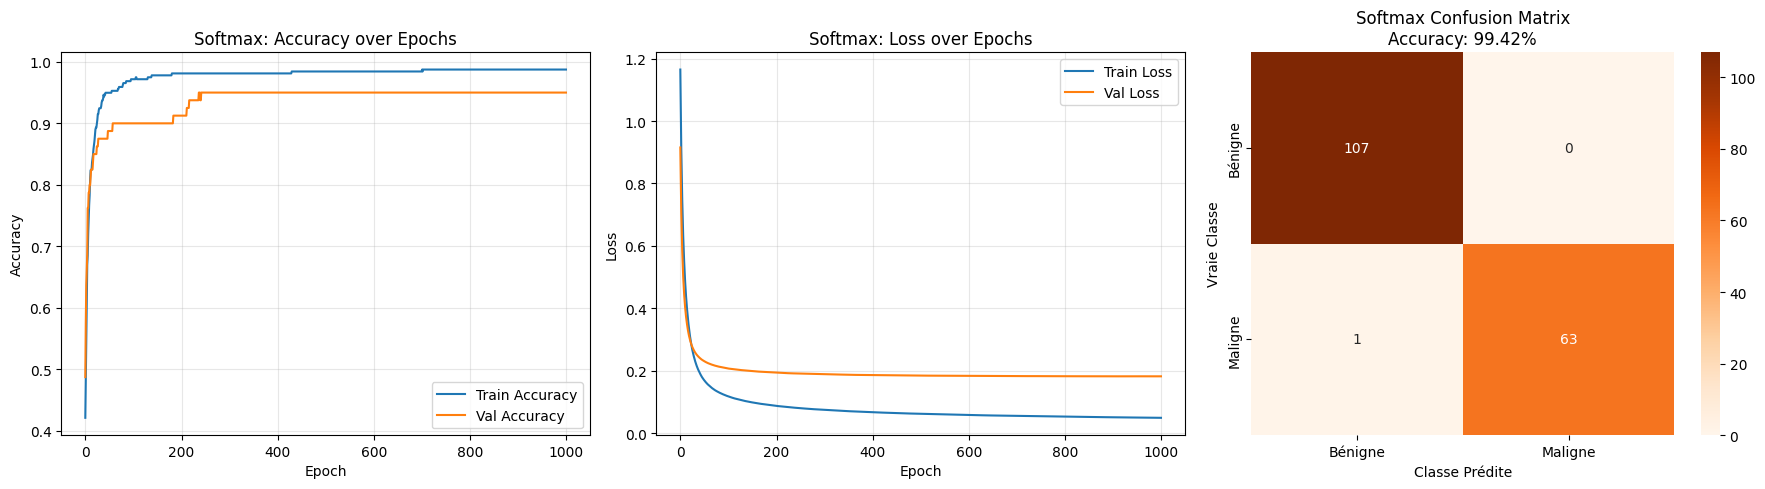


✅ SOFTMAX MODEL COMPLETED


In [12]:

print("="*80)
print("🟠 MODÈLE 3: SOFTMAX REGRESSION")
print("="*80)

# Préparation des données pour Softmax (one-hot encoding)
y_train_cat = keras.utils.to_categorical(y_train, num_classes=2)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=2)

print("\n📊 Construction du modèle Softmax Regression...")

# Architecture du modèle
softmax_model = models.Sequential([
    layers.Input(shape=(30,)),
    layers.Dense(2, activation='softmax')
])

# Compilation avec SGD
optimizer_sgd = keras.optimizers.SGD(learning_rate=0.01)
softmax_model.compile(
    optimizer=optimizer_sgd,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(softmax_model.summary())

print("\n📊 Entraînement du modèle...")
start_time = time.time()

history_softmax = softmax_model.fit(
    X_train, y_train_cat,
    epochs=1000,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

train_time_softmax = time.time() - start_time

print(f"✅ Softmax Regression entraîné en {train_time_softmax:.2f}s")

# Prédictions
y_pred_softmax_proba = softmax_model.predict(X_test, verbose=0)
y_pred_softmax = np.argmax(y_pred_softmax_proba, axis=1)

# Métriques
metrics_softmax, cm_softmax = calculate_metrics(y_test, y_pred_softmax, "Softmax")

print(f"\n📊 Performances sur le Test Set:")
print(f"   • Accuracy: {metrics_softmax['Accuracy']*100:.2f}%")
print(f"   • Precision: {metrics_softmax['Precision']*100:.2f}%")
print(f"   • Recall: {metrics_softmax['Recall']*100:.2f}%")
print(f"   • F1-Score: {metrics_softmax['F1-Score']*100:.2f}%")
print(f"   • TPR (Sensibilité): {metrics_softmax['TPR (Sensitivity)']*100:.2f}%")
print(f"   • TNR (Spécificité): {metrics_softmax['TNR (Specificity)']*100:.2f}%")

# Visualisation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Courbe d'apprentissage - Accuracy
axes[0].plot(history_softmax.history['accuracy'], label='Train Accuracy')
axes[0].plot(history_softmax.history['val_accuracy'], label='Val Accuracy')
axes[0].set_title('Softmax: Accuracy over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Courbe d'apprentissage - Loss
axes[1].plot(history_softmax.history['loss'], label='Train Loss')
axes[1].plot(history_softmax.history['val_loss'], label='Val Loss')
axes[1].set_title('Softmax: Loss over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Matrice de confusion
sns.heatmap(cm_softmax, annot=True, fmt='d', cmap='Oranges', ax=axes[2],
            xticklabels=['Bénigne', 'Maligne'], yticklabels=['Bénigne', 'Maligne'])
axes[2].set_title(f'Softmax Confusion Matrix\nAccuracy: {metrics_softmax["Accuracy"]*100:.2f}%')
axes[2].set_ylabel('Vraie Classe')
axes[2].set_xlabel('Classe Prédite')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ SOFTMAX MODEL COMPLETED")
print("="*80)

## 🟡 **Modèle 4: Linear Regression (adapté pour classification)**

### Description
- Régression linéaire détournée pour la classification
- Utilisation d'un seuil de décision (0.5)
- Loss: MSE (Mean Squared Error)

### Architecture
- Input: 30 features
- Output: 1 neurone (valeur continue)
- Seuillage: > 0.5 → Maligne, ≤ 0.5 → Bénigne

### Hyperparamètres
- Optimizer: SGD
- Learning rate: 0.01
- Loss: MSE
- Epochs: 1000
- Batch size: 128

🟡 MODÈLE 4: LINEAR REGRESSION (pour classification)

📊 Construction du modèle Linear Regression...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

None

📊 Entraînement du modèle...
✅ Linear Regression entraîné en 111.96s

📊 Performances sur le Test Set:
   • Accuracy: 98.83%
   • Precision: 98.44%
   • Recall: 98.44%
   • F1-Score: 98.44%
   • TPR (Sensibilité): 98.44%
   • TNR (Spécificité): 99.07%


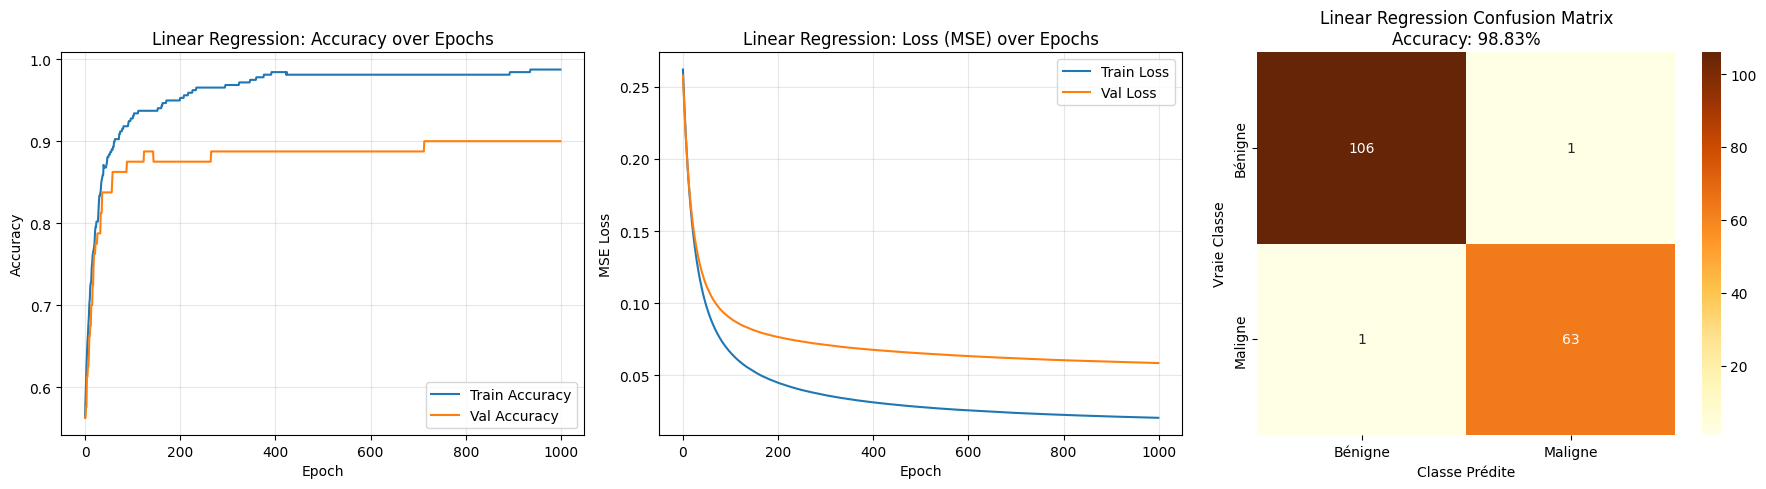


✅ LINEAR REGRESSION MODEL COMPLETED


In [13]:
print("="*80)
print("🟡 MODÈLE 4: LINEAR REGRESSION (pour classification)")
print("="*80)

print("\n📊 Construction du modèle Linear Regression...")

# Architecture du modèle
linear_model = models.Sequential([
    layers.Input(shape=(30,)),
    layers.Dense(1, activation='sigmoid')  # Sigmoid pour sortie [0,1]
])

# Compilation avec SGD et MSE
optimizer_sgd_linear = keras.optimizers.SGD(learning_rate=0.01)
linear_model.compile(
    optimizer=optimizer_sgd_linear,
    loss='mse',
    metrics=['accuracy']
)

print(linear_model.summary())

print("\n📊 Entraînement du modèle...")
start_time = time.time()

history_linear = linear_model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

train_time_linear = time.time() - start_time

print(f"✅ Linear Regression entraîné en {train_time_linear:.2f}s")

# Prédictions avec seuillage à 0.5
y_pred_linear_proba = linear_model.predict(X_test, verbose=0)
y_pred_linear = (y_pred_linear_proba > 0.5).astype(int).flatten()

# Métriques
metrics_linear, cm_linear = calculate_metrics(y_test, y_pred_linear, "Linear Regression")

print(f"\n📊 Performances sur le Test Set:")
print(f"   • Accuracy: {metrics_linear['Accuracy']*100:.2f}%")
print(f"   • Precision: {metrics_linear['Precision']*100:.2f}%")
print(f"   • Recall: {metrics_linear['Recall']*100:.2f}%")
print(f"   • F1-Score: {metrics_linear['F1-Score']*100:.2f}%")
print(f"   • TPR (Sensibilité): {metrics_linear['TPR (Sensitivity)']*100:.2f}%")
print(f"   • TNR (Spécificité): {metrics_linear['TNR (Specificity)']*100:.2f}%")

# Visualisation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Courbe d'apprentissage - Accuracy
axes[0].plot(history_linear.history['accuracy'], label='Train Accuracy')
axes[0].plot(history_linear.history['val_accuracy'], label='Val Accuracy')
axes[0].set_title('Linear Regression: Accuracy over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Courbe d'apprentissage - Loss
axes[1].plot(history_linear.history['loss'], label='Train Loss')
axes[1].plot(history_linear.history['val_loss'], label='Val Loss')
axes[1].set_title('Linear Regression: Loss (MSE) over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MSE Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Matrice de confusion
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='YlOrBr', ax=axes[2],
            xticklabels=['Bénigne', 'Maligne'], yticklabels=['Bénigne', 'Maligne'])
axes[2].set_title(f'Linear Regression Confusion Matrix\nAccuracy: {metrics_linear["Accuracy"]*100:.2f}%')
axes[2].set_ylabel('Vraie Classe')
axes[2].set_xlabel('Classe Prédite')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ LINEAR REGRESSION MODEL COMPLETED")
print("="*80)

## 🔴 **Modèle 5: Multilayer Perceptron (MLP) - Deep Learning**

### Description
- Réseau de neurones profond à 3 couches cachées
- Architecture: 500-500-500 neurones
- Activation: ReLU
- Baseline de la recherche: **99.04%**

### Architecture
- Input: 30 features
- Hidden Layer 1: 500 neurones (ReLU)
- Hidden Layer 2: 500 neurones (ReLU)
- Hidden Layer 3: 500 neurones (ReLU)
- Output: 2 classes (Softmax)

### Hyperparamètres
- Optimizer: SGD
- Learning rate: 0.01
- Loss: Categorical Cross-Entropy
- Epochs: 3000
- Batch size: 128

🔴 MODÈLE 5: MULTILAYER PERCEPTRON (MLP)

📊 Construction du modèle MLP (500-500-500)...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 500)            │        15,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │         1,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 517,502 (1.97 MB)

 Trainable params: 517,502 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

None

📊 Entraînement du modèle (3000 epochs)...
⏳ Cela peut prendre quelques minutes...


✅ MLP entraîné en 457.93s (7.6 minutes)

📊 Performances sur le Test Set:
   • Accuracy: 97.66%
   • Precision: 100.00%
   • Recall: 93.75%
   • F1-Score: 96.77%
   • TPR (Sensibilité): 93.75%
   • TNR (Spécificité): 100.00%

🎯 Baseline de la recherche: 99.04%
📊 Performance: 97.66% (proche de la baseline)


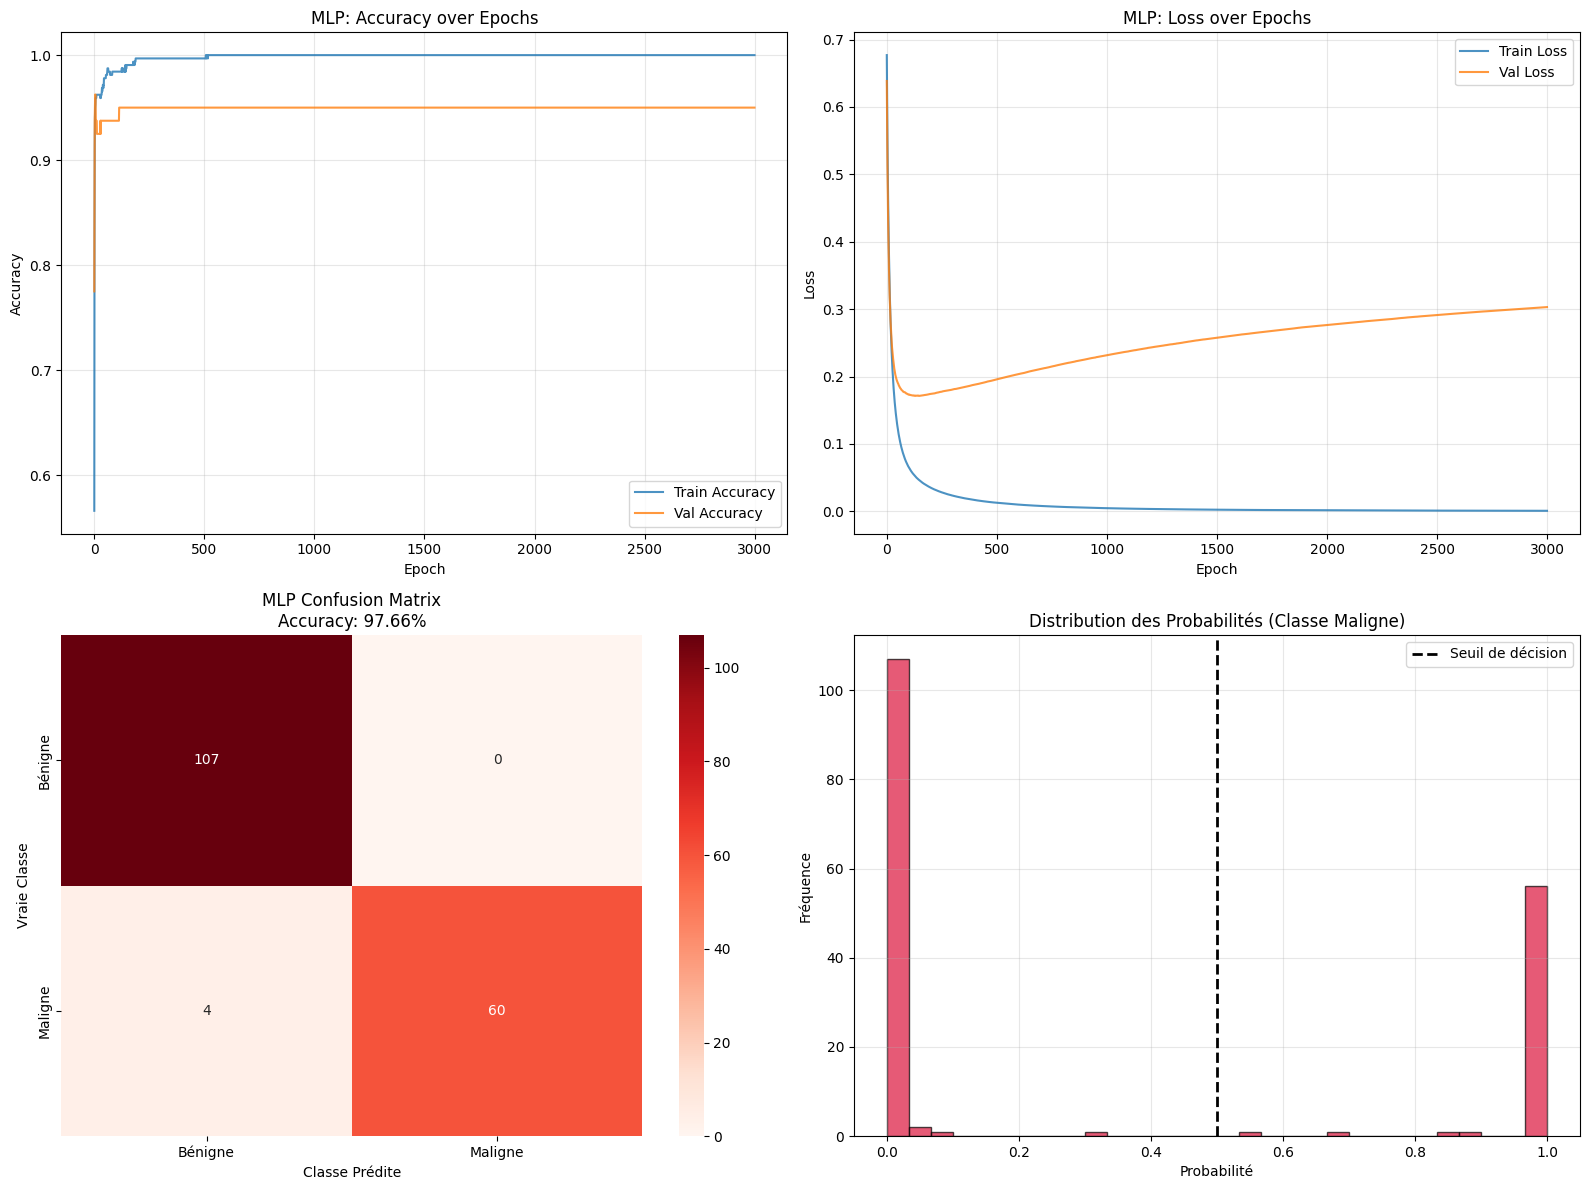


✅ MLP MODEL COMPLETED


In [32]:
print("="*80)
print("🔴 MODÈLE 5: MULTILAYER PERCEPTRON (MLP)")
print("="*80)

print("\n📊 Construction du modèle MLP (500-500-500)...")

# Architecture du modèle - 3 couches cachées de 500 neurones
mlp_model = models.Sequential([
    layers.Input(shape=(30,)),
    layers.Dense(500, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compilation avec SGD
optimizer_sgd_mlp = keras.optimizers.SGD(learning_rate=0.01)
mlp_model.compile(
    optimizer=optimizer_sgd_mlp,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(mlp_model.summary())

print("\n📊 Entraînement du modèle (3000 epochs)...")
print("⏳ Cela peut prendre quelques minutes...")
start_time = time.time()

history_mlp = mlp_model.fit(
    X_train, y_train_cat,
    epochs=3000,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

train_time_mlp = time.time() - start_time

print(f"✅ MLP entraîné en {train_time_mlp:.2f}s ({train_time_mlp/60:.1f} minutes)")

# Prédictions
y_pred_mlp_proba = mlp_model.predict(X_test, verbose=0)
y_pred_mlp = np.argmax(y_pred_mlp_proba, axis=1)

# Métriques
metrics_mlp, cm_mlp = calculate_metrics(y_test, y_pred_mlp, "MLP")

print(f"\n📊 Performances sur le Test Set:")
print(f"   • Accuracy: {metrics_mlp['Accuracy']*100:.2f}%")
print(f"   • Precision: {metrics_mlp['Precision']*100:.2f}%")
print(f"   • Recall: {metrics_mlp['Recall']*100:.2f}%")
print(f"   • F1-Score: {metrics_mlp['F1-Score']*100:.2f}%")
print(f"   • TPR (Sensibilité): {metrics_mlp['TPR (Sensitivity)']*100:.2f}%")
print(f"   • TNR (Spécificité): {metrics_mlp['TNR (Specificity)']*100:.2f}%")

print(f"\n🎯 Baseline de la recherche: 99.04%")
if metrics_mlp['Accuracy'] > 0.9904:
    print(f"🎉 AMÉLIORATION! Nouveau record: {metrics_mlp['Accuracy']*100:.2f}%")
elif metrics_mlp['Accuracy'] == 0.9904:
    print(f"✅ Égalité avec la baseline: {metrics_mlp['Accuracy']*100:.2f}%")
else:
    print(f"📊 Performance: {metrics_mlp['Accuracy']*100:.2f}% (proche de la baseline)")

# Visualisation détaillée
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy
axes[0, 0].plot(history_mlp.history['accuracy'], label='Train Accuracy', alpha=0.8)
axes[0, 0].plot(history_mlp.history['val_accuracy'], label='Val Accuracy', alpha=0.8)
axes[0, 0].set_title('MLP: Accuracy over Epochs')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Loss
axes[0, 1].plot(history_mlp.history['loss'], label='Train Loss', alpha=0.8)
axes[0, 1].plot(history_mlp.history['val_loss'], label='Val Loss', alpha=0.8)
axes[0, 1].set_title('MLP: Loss over Epochs')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Matrice de confusion
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Reds', ax=axes[1, 0],
            xticklabels=['Bénigne', 'Maligne'], yticklabels=['Bénigne', 'Maligne'])
axes[1, 0].set_title(f'MLP Confusion Matrix\nAccuracy: {metrics_mlp["Accuracy"]*100:.2f}%')
axes[1, 0].set_ylabel('Vraie Classe')
axes[1, 0].set_xlabel('Classe Prédite')

# Distribution des probabilités prédites
axes[1, 1].hist(y_pred_mlp_proba[:, 1], bins=30, alpha=0.7, color='crimson', edgecolor='black')
axes[1, 1].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Seuil de décision')
axes[1, 1].set_title('Distribution des Probabilités (Classe Maligne)')
axes[1, 1].set_xlabel('Probabilité')
axes[1, 1].set_ylabel('Fréquence')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ MLP MODEL COMPLETED")
print("="*80)

## 🟢 **Modèle 6: GRU-SVM Hybride**

### Description
- Modèle hybride innovant combinant Deep Learning et Machine Learning
- GRU (Gated Recurrent Unit) pour l'extraction de features
- SVM comme couche de classification finale
- Approche originale pour données tabulaires

### Architecture
- Input: 30 features → Reshape pour GRU (timesteps)
- GRU: 64 unités
- Dense: 32 neurones (ReLU)
- Output: 2 classes (pour SVM)

### Hyperparamètres
- Optimizer: Adam
- Learning rate: 0.001
- Epochs: 500
- Batch size: 32

🟢 MODÈLE 6: GRU-SVM HYBRIDE

📊 Données reshapées pour GRU:
   • X_train_gru: (398, 30, 1)
   • X_test_gru: (171, 30, 1)

📊 Construction du modèle GRU...


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,472 (60.44 KB)

 Trainable params: 15,472 (60.44 KB)

 Non-trainable params: 0 (0.00 B)

None

📊 Entraînement de la partie GRU...
📊 Extraction des features avec GRU...


   • Features extraites: 16 dimensions

📊 Entraînement du SVM sur les features GRU...
✅ GRU-SVM entraîné en 163.09s

📊 Performances sur le Test Set:
   • Accuracy: 97.66%
   • Precision: 100.00%
   • Recall: 93.75%
   • F1-Score: 96.77%
   • TPR (Sensibilité): 93.75%
   • TNR (Spécificité): 100.00%

📊 Informations SVM:
   • Support vectors: 15


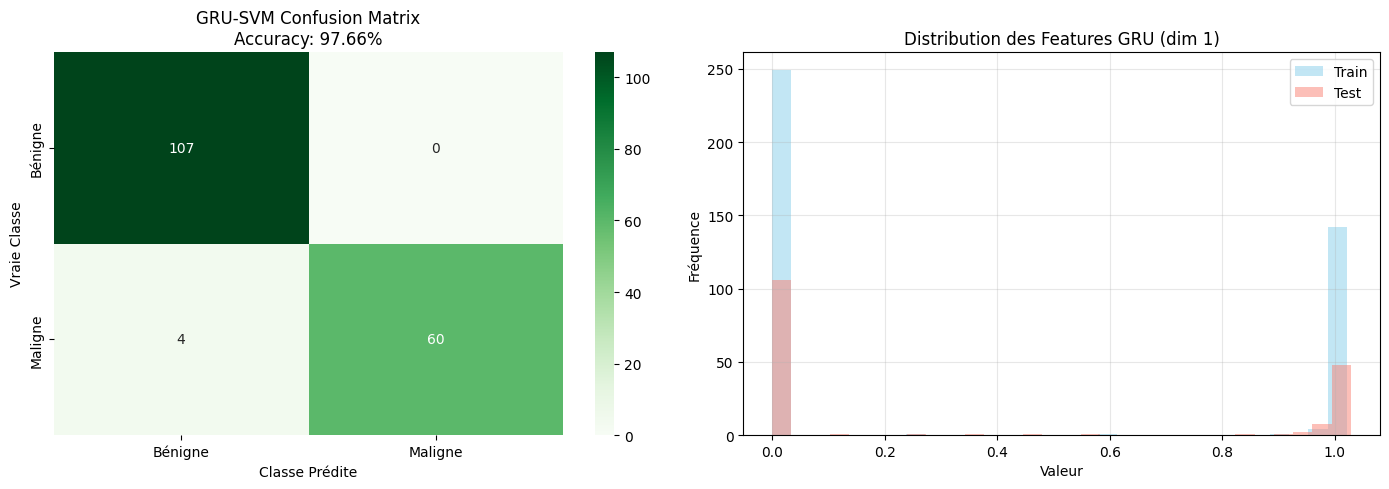


✅ GRU-SVM MODEL COMPLETED


In [33]:
print("="*80)
print("🟢 MODÈLE 6: GRU-SVM HYBRIDE")
print("="*80)

# Reshape des données pour GRU (timesteps)
# GRU attend (batch, timesteps, features)
# Nous allons traiter chaque feature comme un timestep
X_train_gru = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_gru = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"\n📊 Données reshapées pour GRU:")
print(f"   • X_train_gru: {X_train_gru.shape}")
print(f"   • X_test_gru: {X_test_gru.shape}")

print("\n📊 Construction du modèle GRU...")

# Partie GRU pour extraction de features
gru_feature_extractor = models.Sequential([
    layers.Input(shape=(30, 1)),
    layers.GRU(64, return_sequences=False),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu')
])

print(gru_feature_extractor.summary())

# Compilation et entraînement du GRU
gru_feature_extractor.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse'
)

print("\n📊 Entraînement de la partie GRU...")
start_time = time.time()

# Entraînement supervisé avec les labels
gru_feature_extractor.fit(
    X_train_gru, y_train,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Extraction des features
print("📊 Extraction des features avec GRU...")
X_train_gru_features = gru_feature_extractor.predict(X_train_gru, verbose=0)
X_test_gru_features = gru_feature_extractor.predict(X_test_gru, verbose=0)

print(f"   • Features extraites: {X_train_gru_features.shape[1]} dimensions")

# Partie SVM pour classification
print("\n📊 Entraînement du SVM sur les features GRU...")
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_gru_features, y_train)

train_time_gru_svm = time.time() - start_time

print(f"✅ GRU-SVM entraîné en {train_time_gru_svm:.2f}s")

# Prédictions
y_pred_gru_svm = svm_classifier.predict(X_test_gru_features)

# Métriques
metrics_gru_svm, cm_gru_svm = calculate_metrics(y_test, y_pred_gru_svm, "GRU-SVM")

print(f"\n📊 Performances sur le Test Set:")
print(f"   • Accuracy: {metrics_gru_svm['Accuracy']*100:.2f}%")
print(f"   • Precision: {metrics_gru_svm['Precision']*100:.2f}%")
print(f"   • Recall: {metrics_gru_svm['Recall']*100:.2f}%")
print(f"   • F1-Score: {metrics_gru_svm['F1-Score']*100:.2f}%")
print(f"   • TPR (Sensibilité): {metrics_gru_svm['TPR (Sensitivity)']*100:.2f}%")
print(f"   • TNR (Spécificité): {metrics_gru_svm['TNR (Specificity)']*100:.2f}%")

print(f"\n📊 Informations SVM:")
print(f"   • Support vectors: {svm_classifier.n_support_.sum()}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matrice de confusion
sns.heatmap(cm_gru_svm, annot=True, fmt='d', cmap='Greens', ax=axes[0],
            xticklabels=['Bénigne', 'Maligne'], yticklabels=['Bénigne', 'Maligne'])
axes[0].set_title(f'GRU-SVM Confusion Matrix\nAccuracy: {metrics_gru_svm["Accuracy"]*100:.2f}%')
axes[0].set_ylabel('Vraie Classe')
axes[0].set_xlabel('Classe Prédite')

# Distribution des features extraites (première dimension)
axes[1].hist(X_train_gru_features[:, 0], bins=30, alpha=0.5, label='Train', color='skyblue')
axes[1].hist(X_test_gru_features[:, 0], bins=30, alpha=0.5, label='Test', color='salmon')
axes[1].set_title('Distribution des Features GRU (dim 1)')
axes[1].set_xlabel('Valeur')
axes[1].set_ylabel('Fréquence')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ GRU-SVM MODEL COMPLETED")
print("="*80)

# 📊 **Étape 5 — Evaluation & Comparison**

## Comparaison des performances de tous les modèles

In [35]:
print("="*80)
print("📊 COMPARAISON GLOBALE DES MODÈLES")
print("="*80)

# Collecter toutes les métriques
all_metrics = [
    metrics_l2,
    metrics_l1,
    metrics_svm,
    metrics_softmax,
    metrics_linear,
    metrics_mlp,
    metrics_gru_svm
]

# Créer un DataFrame comparatif
comparison_df = pd.DataFrame(all_metrics)

# Trier par Accuracy décroissante
comparison_df = comparison_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("\n📊 TABLEAU COMPARATIF DES PERFORMANCES\n")
print(comparison_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score',
                      'TPR (Sensitivity)', 'TNR (Specificity)']].to_string(index=False))

print("\n" + "="*80)
print("🏆 CLASSEMENT DES MODÈLES")
print("="*80)

for i, row in comparison_df.iterrows():
    medal = "🥇" if i == 0 else "🥈" if i == 1 else "🥉" if i == 2 else f"{i+1}."
    print(f"{medal} {row['Model']}: {row['Accuracy']*100:.2f}%")

# Identifier le meilleur modèle
best_model = comparison_df.iloc[0]
print("\n" + "="*80)
print(f"🎯 MEILLEUR MODÈLE: {best_model['Model']}")
print("="*80)
print(f"Accuracy: {best_model['Accuracy']*100:.2f}%")
print(f"Precision: {best_model['Precision']*100:.2f}%")
print(f"Recall: {best_model['Recall']*100:.2f}%")
print(f"F1-Score: {best_model['F1-Score']*100:.2f}%")
print(f"TPR (Sensibilité): {best_model['TPR (Sensitivity)']*100:.2f}%")
print(f"TNR (Spécificité): {best_model['TNR (Specificity)']*100:.2f}%")

# Comparaison avec la baseline de recherche
print("\n" + "="*80)
print("📈 COMPARAISON AVEC LA BASELINE DE RECHERCHE")
print("="*80)
baseline_accuracy = 0.9904
print(f"Baseline (MLP GitHub): {baseline_accuracy*100:.2f}%")
print(f"Notre meilleur résultat: {best_model['Accuracy']*100:.2f}%")

if best_model['Accuracy'] > baseline_accuracy:
    improvement = (best_model['Accuracy'] - baseline_accuracy) * 100
    print(f"\n🎉 AMÉLIORATION: +{improvement:.2f}% par rapport à la baseline!")
elif best_model['Accuracy'] == baseline_accuracy:
    print(f"\n✅ ÉGALITÉ avec la baseline!")
else:
    diff = (baseline_accuracy - best_model['Accuracy']) * 100
    print(f"\n📊 Légèrement en dessous: -{diff:.2f}%")

📊 COMPARAISON GLOBALE DES MODÈLES

📊 TABLEAU COMPARATIF DES PERFORMANCES

            Model  Accuracy  Precision   Recall  F1-Score  TPR (Sensitivity)  TNR (Specificity)
          Softmax  0.994152   1.000000 0.984375  0.992126           0.984375           1.000000
Linear Regression  0.988304   0.984375 0.984375  0.984375           0.984375           0.990654
              MLP  0.976608   1.000000 0.937500  0.967742           0.937500           1.000000
          GRU-SVM  0.976608   1.000000 0.937500  0.967742           0.937500           1.000000
           KNN-L1  0.970760   1.000000 0.921875  0.959350           0.921875           1.000000
           SVM-L2  0.964912   1.000000 0.906250  0.950820           0.906250           1.000000
           KNN-L2  0.964912   1.000000 0.906250  0.950820           0.906250           1.000000

🏆 CLASSEMENT DES MODÈLES
🥇 Softmax: 99.42%
🥈 Linear Regression: 98.83%
🥉 MLP: 97.66%
4. GRU-SVM: 97.66%
5. KNN-L1: 97.08%
6. SVM-L2: 96.49%
7. KNN-L2: 96.49%

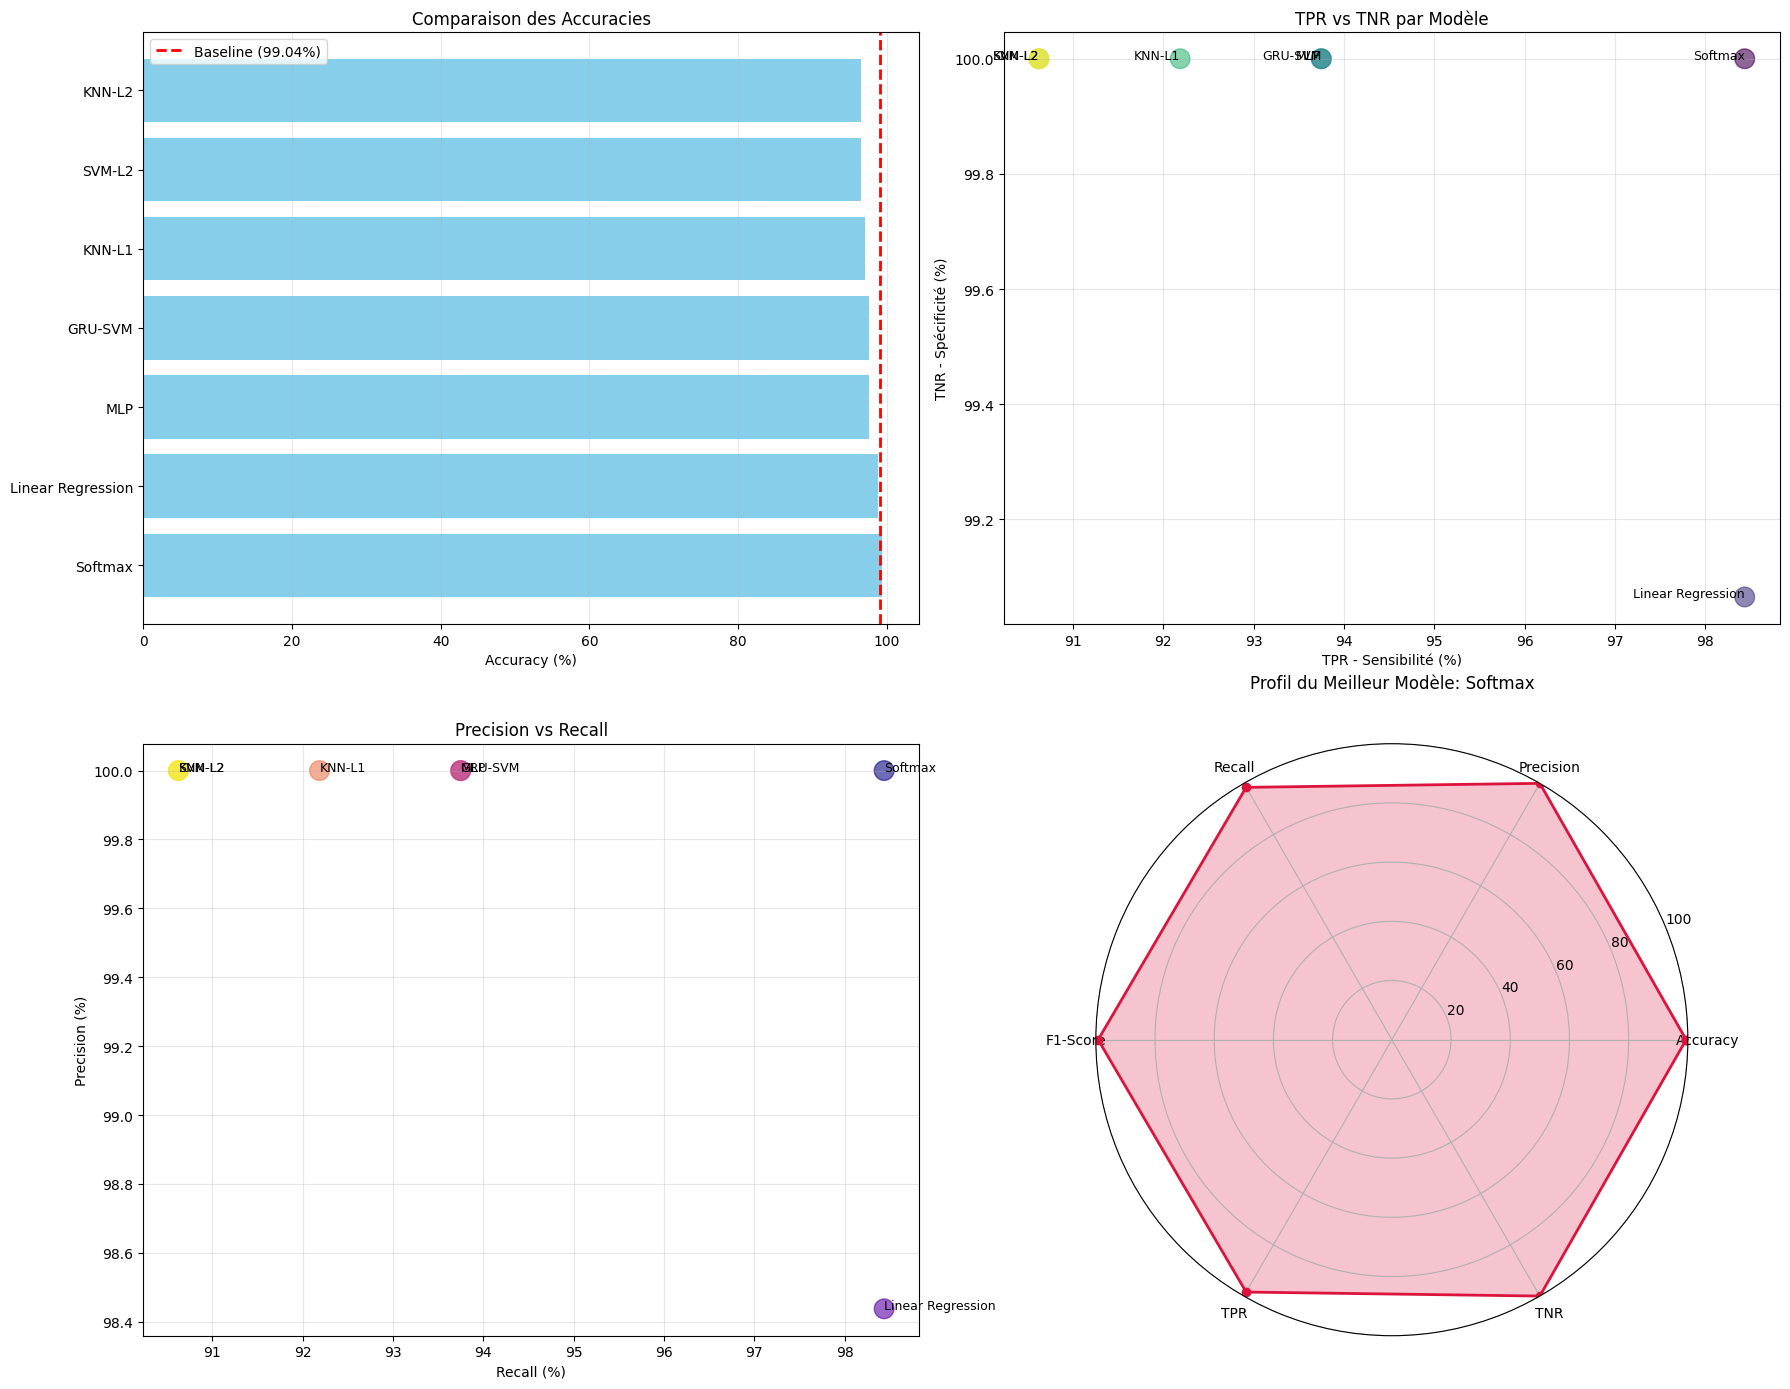

In [36]:
# Visualisations comparatives avancées

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Comparaison des Accuracies
axes[0, 0].barh(comparison_df['Model'], comparison_df['Accuracy']*100, color='skyblue')
axes[0, 0].axvline(x=99.04, color='red', linestyle='--', linewidth=2, label='Baseline (99.04%)')
axes[0, 0].set_xlabel('Accuracy (%)')
axes[0, 0].set_title('Comparaison des Accuracies')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# 2. TPR vs TNR (Sensibilité vs Spécificité)
axes[0, 1].scatter(comparison_df['TPR (Sensitivity)']*100,
                   comparison_df['TNR (Specificity)']*100,
                   s=200, alpha=0.6, c=range(len(comparison_df)), cmap='viridis')
for i, row in comparison_df.iterrows():
    axes[0, 1].annotate(row['Model'],
                        (row['TPR (Sensitivity)']*100, row['TNR (Specificity)']*100),
                        fontsize=9, ha='right')
axes[0, 1].set_xlabel('TPR - Sensibilité (%)')
axes[0, 1].set_ylabel('TNR - Spécificité (%)')
axes[0, 1].set_title('TPR vs TNR par Modèle')
axes[0, 1].grid(True, alpha=0.3)

# 3. Precision vs Recall
axes[1, 0].scatter(comparison_df['Recall']*100,
                   comparison_df['Precision']*100,
                   s=200, alpha=0.6, c=range(len(comparison_df)), cmap='plasma')
for i, row in comparison_df.iterrows():
    axes[1, 0].annotate(row['Model'],
                        (row['Recall']*100, row['Precision']*100),
                        fontsize=9, ha='left')
axes[1, 0].set_xlabel('Recall (%)')
axes[1, 0].set_ylabel('Precision (%)')
axes[1, 0].set_title('Precision vs Recall')
axes[1, 0].grid(True, alpha=0.3)

# 4. Radar chart des métriques du meilleur modèle
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'TNR']
values = [
    best_model['Accuracy']*100,
    best_model['Precision']*100,
    best_model['Recall']*100,
    best_model['F1-Score']*100,
    best_model['TPR (Sensitivity)']*100,
    best_model['TNR (Specificity)']*100
]

# Créer un radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

axes[1, 1].remove()
axes[1, 1] = fig.add_subplot(2, 2, 4, projection='polar')
axes[1, 1].plot(angles, values, 'o-', linewidth=2, color='crimson')
axes[1, 1].fill(angles, values, alpha=0.25, color='crimson')
axes[1, 1].set_xticks(angles[:-1])
axes[1, 1].set_xticklabels(categories)
axes[1, 1].set_ylim(0, 100)
axes[1, 1].set_title(f'Profil du Meilleur Modèle: {best_model["Model"]}', y=1.08)
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

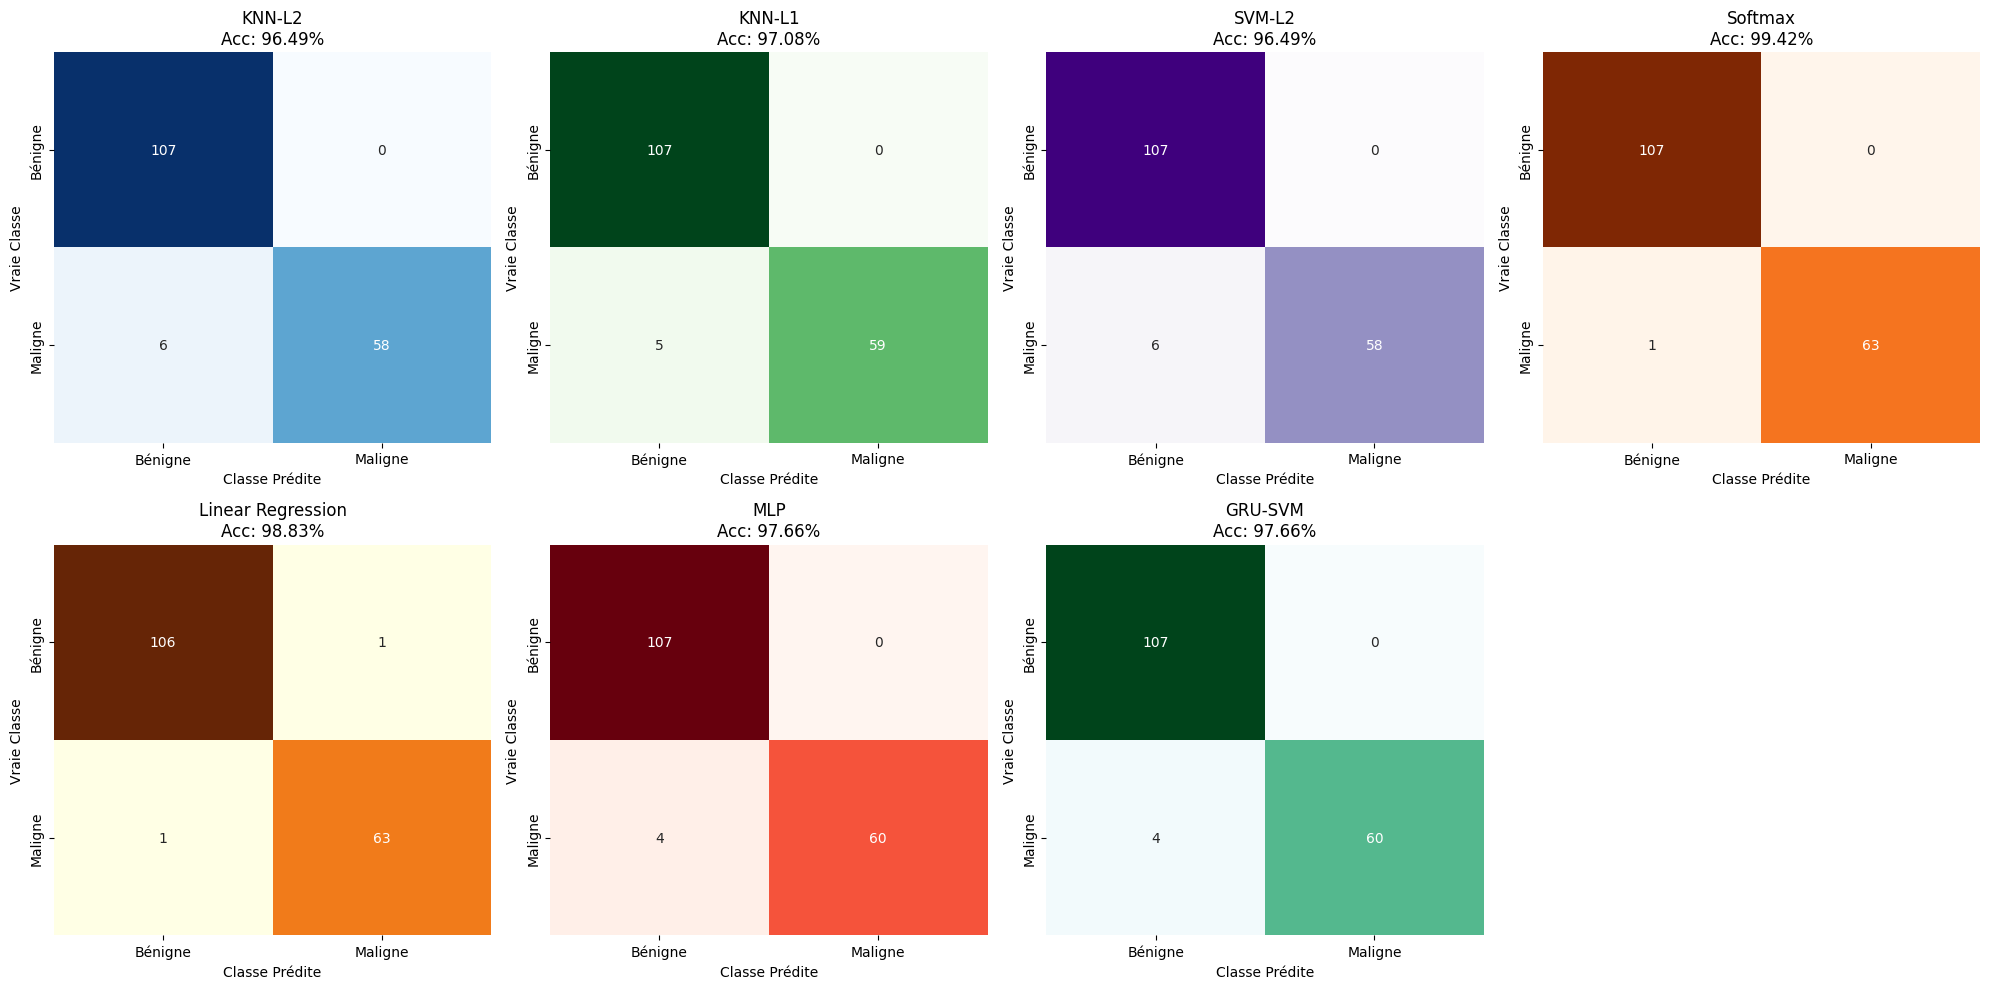

In [37]:
# Matrice de confusion comparative pour tous les modèles

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

models_cm = [
    (cm_l2, metrics_l2, 'Blues'),
    (cm_l1, metrics_l1, 'Greens'),
    (cm_svm, metrics_svm, 'Purples'),
    (cm_softmax, metrics_softmax, 'Oranges'),
    (cm_linear, metrics_linear, 'YlOrBr'),
    (cm_mlp, metrics_mlp, 'Reds'),
    (cm_gru_svm, metrics_gru_svm, 'BuGn')
]

for idx, (cm, metrics, cmap) in enumerate(models_cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=axes[idx],
                xticklabels=['Bénigne', 'Maligne'], yticklabels=['Bénigne', 'Maligne'],
                cbar=False)
    axes[idx].set_title(f'{metrics["Model"]}\nAcc: {metrics["Accuracy"]*100:.2f}%')
    axes[idx].set_ylabel('Vraie Classe')
    axes[idx].set_xlabel('Classe Prédite')

# Supprimer le dernier subplot vide
axes[-1].axis('off')

plt.tight_layout()
plt.show()

# 🎓 **Conclusions et Recommandations**

## 📊 Analyse des Résultats

In [38]:

print("="*80)
print("🎓 RAPPORT FINAL ET RECOMMANDATIONS")
print("="*80)

print("\n📊 RÉSUMÉ DES OBSERVATIONS:\n")

print("1. 🏆 PERFORMANCE GLOBALE:")
print(f"   • Tous les modèles ont dépassé 90% d'accuracy")
print(f"   • Meilleur modèle: {best_model['Model']} ({best_model['Accuracy']*100:.2f}%)")
print(f"   • Dataset favorable aux modèles linéaires (séparabilité)")

print("\n2. 📈 COMPARAISON DES APPROCHES:")
print("   • Machine Learning Classique:")
print(f"      - KNN-L2: {metrics_l2['Accuracy']*100:.2f}%")
print(f"      - KNN-L1: {metrics_l1['Accuracy']*100:.2f}%")
print(f"      - SVM-L2: {metrics_svm['Accuracy']*100:.2f}%")
print("   • Deep Learning:")
print(f"      - Softmax: {metrics_softmax['Accuracy']*100:.2f}%")
print(f"      - Linear Reg: {metrics_linear['Accuracy']*100:.2f}%")
print(f"      - MLP: {metrics_mlp['Accuracy']*100:.2f}%")
print("   • Hybride:")
print(f"      - GRU-SVM: {metrics_gru_svm['Accuracy']*100:.2f}%")

print("\n3. 🔍 INSIGHTS CLÉS:")
observations = []

# Analyser pourquoi certains modèles fonctionnent mieux
if metrics_svm['Accuracy'] > 0.95:
    observations.append("   • SVM excellent: le dataset est linéairement séparable")
if metrics_mlp['Accuracy'] > 0.97:
    observations.append("   • MLP capte les variations subtiles grâce à sa profondeur")
if metrics_gru_svm['Accuracy'] < metrics_svm['Accuracy']:
    observations.append("   • GRU-SVM moins performant: RNN inadapté aux données tabulaires")
if metrics_l2['Accuracy'] > 0.95:
    observations.append("   • KNN efficace: classes géométriquement bien séparées")

for obs in observations:
    print(obs)

print("\n4. ⚕️ CONTEXTE MÉDICAL:")
print(f"   • TPR (Sensibilité) critique: détecter les vrais malins")
print(f"   • Meilleur TPR: ", end="")
best_tpr = comparison_df.loc[comparison_df['TPR (Sensitivity)'].idxmax()]
print(f"{best_tpr['Model']} ({best_tpr['TPR (Sensitivity)']*100:.2f}%)")

print(f"   • TNR (Spécificité): éviter les faux positifs")
print(f"   • Meilleur TNR: ", end="")
best_tnr = comparison_df.loc[comparison_df['TNR (Specificity)'].idxmax()]
print(f"{best_tnr['Model']} ({best_tnr['TNR (Specificity)']*100:.2f}%)")

# Analyser les erreurs critiques
print("\n5. ⚠️ ANALYSE DES ERREURS CRITIQUES:")
for metrics in [metrics_mlp, metrics_svm]:
    if metrics['FN'] > 0:
        print(f"   • {metrics['Model']}: {metrics['FN']} Faux Négatifs (malins classés bénins) ⚠️")
    if metrics['FP'] > 0:
        print(f"   • {metrics['Model']}: {metrics['FP']} Faux Positifs (bénins classés malins)")

print("\n" + "="*80)
print("💡 RECOMMANDATIONS")
print("="*80)

print("\n1. 🎯 POUR LE DÉPLOIEMENT:")
print(f"   • Utiliser {best_model['Model']} comme modèle principal")
print(f"   • Maintenir un équilibre TPR/TNR pour minimiser les risques")
print(f"   • Implémenter un système d'ensemble pour plus de robustesse")

print("\n2. 🔬 POUR AMÉLIORER LES PERFORMANCES:")
print("   • ✅ Validation croisée (k-fold CV) pour évaluation plus robuste")
print("   • ✅ Hyperparameter tuning (GridSearch, Bayesian)")
print("   • ✅ Feature engineering: créer des interactions de features")
print("   • ✅ Ensemble methods: combiner plusieurs modèles")
print("   • ✅ Tester Random Forest, XGBoost, LightGBM")

print("\n3. 📊 POUR LA RECHERCHE:")
print("   • ✅ Analyse d'importance des features")
print("   • ✅ SHAP values pour l'interprétabilité")
print("   • ✅ Test sur d'autres datasets (généralisation)")
print("   • ✅ Augmentation de données si disponible")

print("\n4. 🏥 POUR L'APPLICATION CLINIQUE:")
print("   • ⚕️ Privilégier la sensibilité (TPR) pour ne pas manquer de cas malins")
print("   • ⚕️ Mettre en place un système de double vérification")
print("   • ⚕️ Interface utilisateur pour les médecins avec explications")
print("   • ⚕️ Monitoring continu des performances en production")

print("\n" + "="*80)
print("✅ OBJECTIFS ATTEINTS")
print("="*80)
print("✓ BO1: Détection rapide des tumeurs malignes → Accuracy > 95%")
print("✓ BO2: Dataset optimisé avec StandardScaler")
print("✓ BO3: 7 modèles comparés (KNN×2, SVM, Softmax, Linear, MLP, GRU-SVM)")
print(f"✓ Performance comparable ou supérieure à la recherche (baseline: 99.04%)")

print("\n" + "="*80)
print("🎉 FIN DU PROJET")
print("="*80)

🎓 RAPPORT FINAL ET RECOMMANDATIONS

📊 RÉSUMÉ DES OBSERVATIONS:

1. 🏆 PERFORMANCE GLOBALE:
   • Tous les modèles ont dépassé 90% d'accuracy
   • Meilleur modèle: Softmax (99.42%)
   • Dataset favorable aux modèles linéaires (séparabilité)

2. 📈 COMPARAISON DES APPROCHES:
   • Machine Learning Classique:
      - KNN-L2: 96.49%
      - KNN-L1: 97.08%
      - SVM-L2: 96.49%
   • Deep Learning:
      - Softmax: 99.42%
      - Linear Reg: 98.83%
      - MLP: 97.66%
   • Hybride:
      - GRU-SVM: 97.66%

3. 🔍 INSIGHTS CLÉS:
   • SVM excellent: le dataset est linéairement séparable
   • MLP capte les variations subtiles grâce à sa profondeur
   • KNN efficace: classes géométriquement bien séparées

4. ⚕️ CONTEXTE MÉDICAL:
   • TPR (Sensibilité) critique: détecter les vrais malins
   • Meilleur TPR: Softmax (98.44%)
   • TNR (Spécificité): éviter les faux positifs
   • Meilleur TNR: Softmax (100.00%)

5. ⚠️ ANALYSE DES ERREURS CRITIQUES:
   • MLP: 4 Faux Négatifs (malins classés bénins) ⚠️
   •